In [265]:
import math
import re

import pandas as pd
import numpy as np

import requests

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns 
sns.set()

import networkx as nx

pd.options.display.float_format = '{:,.8}'.format

In [266]:
df_menge_abfahrten = pd.read_csv("1a_menge_abfahrten.csv")
df_menge_touren = pd.read_csv("1a_menge_touren.csv")

df_menge_einsteiger = pd.read_csv("1b_menge_einsteiger.csv")
df_menge_aussteiger = pd.read_csv("1b_menge_aussteiger.csv")                            
df_menge_besetzung = pd.read_csv("1b_menge_besetzung.csv")

In [269]:
df_stops = df_menge_abfahrten \
                .merge(df_menge_einsteiger, on = "stop_name") \
                .drop("stop_kuerzel", axis = 1) \
                .merge(df_menge_aussteiger, on = "stop_name") \
                .query("abfahrten_per_year > 0")
        
df_stops["Einsteiger_per_Abfahrt"] = (df_stops.Einsteiger_per_year / df_stops.abfahrten_per_year).round(2)
df_stops["Aussteiger_per_Abfahrt"] = (df_stops.Aussteiger_per_year / df_stops.abfahrten_per_year).round(2)

df_stops["Einsteiger_per_year_ratio"] = df_stops.Einsteiger_per_year / df_stops.Einsteiger_per_year.max()
df_stops["Aussteiger_per_year_ratio"] = df_stops.Aussteiger_per_year / df_stops.Aussteiger_per_year.max()
df_stops["Abfahrten_per_year_ratio"] = df_stops.abfahrten_per_year / df_stops.abfahrten_per_year.max()
df_stops["Einsteiger_per_Abfahrt_ratio"] = df_stops.Einsteiger_per_Abfahrt / df_stops.Einsteiger_per_Abfahrt.max()
df_stops["Aussteiger_per_Abfahrt_ratio"] = df_stops.Aussteiger_per_Abfahrt / df_stops.Aussteiger_per_Abfahrt.max()

df_stops.sort_values(by="abfahrten_per_year", ascending = False)[:5]

stop_name  stop_lat  stop_lon  abfahrten_per_year  \
736             Zürich, Central  47.37677 8.5437313              815142   
735            Zürich, Bellevue  47.36691 8.5452002              760305   
734  Zürich, Bahnhof Altstetten  47.39073 8.4889507              652844   
733         Zürich, Paradeplatz 47.369733 8.5389295              641234   
732   Zürich, Escher-Wyss-Platz 47.390489  8.522583              604668   

     Einsteiger_per_year stop_kuerzel  Aussteiger_per_year  \
736              6982718         CENT              7138741   
735             12253247         BELL             10443266   
734              5177215         BALT              3802613   
733              8569230         PARA              9167475   
732              3280251         EWYS              3175107   

     Einsteiger_per_Abfahrt  Aussteiger_per_Abfahrt  \
736                    8.57                    8.76   
735                   16.12                   13.74   
734                    7.93                    5.82   
733                   13.36                    14.3   
732                    5.42                    5.25   

     Einsteiger_per_year_ratio  Aussteiger_per_year_ratio  \
736                 0.56986675                 0.68357361   
735                        1.0                        1.0   
734                  0.4225178                 0.36412105   
733                 0.69934361                 0.87783601   
732                 0.26770463                 0.30403391   

     Abfahrten_per_year_ratio  Einsteiger_per_Abfahrt_ratio  \
736                       1.0                    0.37786596   
735                0.93272706                    0.71075838   
734                0.80089604                    0.34964727   
733                0.78665312                    0.58906526   
732                0.74179468                    0.23897707   

     Aussteiger_per_Abfahrt_ratio  
736                    0.43302027  
735                    0.67918932  
734                    0.28769155  
733                    0.70687098  
732                    0.25951557

In [270]:
df_tours= df_menge_touren \
                .merge(df_menge_besetzung, on = ["stop_name_von","stop_name_nach"]) \
                .query("abfahrten_per_year > 0")
    
df_tours["Besetzung_per_Fahrt"] = df_tours.Besetzung_per_year / df_tours.abfahrten_per_year


df_tours["Besetzung_per_year_ratio"] = df_tours.Besetzung_per_year / df_tours.Besetzung_per_year.max()
df_tours["Fahrten_per_year_ratio"] = df_tours.abfahrten_per_year / df_tours.abfahrten_per_year.max()
df_tours["Besetzung_per_Fahrt_ratio"] = df_tours.Besetzung_per_Fahrt / df_tours.Besetzung_per_Fahrt.max()


df_tours.sort_values(by="abfahrten_per_year", ascending = False)[:5]

stop_name_von  stop_lat_von  stop_lon_von  \
0         Zürich, Löwenplatz     47.375959      8.537319   
1        Zürich, Bürkliplatz     47.366696      8.541032   
2           Zürich, Bellevue      47.36691     8.5452002   
3            Zürich, Central      47.37677     8.5437313   
4  Zürich, Escher-Wyss-Platz     47.390489      8.522583   

            stop_name_nach  stop_lat_nach  stop_lon_nach  abfahrten_per_year  \
0  Zürich, Bahnhofplatz/HB      47.377127       8.539633              238021   
1         Zürich, Bellevue       47.36691      8.5452002              233124   
2      Zürich, Bürkliplatz      47.366696       8.541032              232966   
3  Zürich, Bahnhofplatz/HB      47.377127       8.539633              207124   
4        Zürich, Schiffbau      47.388031      8.5198737              201745   

  stop_kuerzel_von stop_kuerzel_nach  Besetzung_per_year  Besetzung_per_Fahrt  \
0             LOEW              BPLA             7360610            30.924204   
1             BURK              BELL             9717113            41.682165   
2             BELL              BURK            10060137            43.182855   
3             CENT              BPLA             5969619            28.821474   
4             EWYS              SBAU             4800328            23.794037   

   Besetzung_per_year_ratio  Fahrten_per_year_ratio  Besetzung_per_Fahrt_ratio  
0                0.69308117                     1.0                 0.20305748  
1                0.91497145              0.97942619                 0.27369744  
2                0.94727088              0.97876238                 0.28355141  
3                0.56210429              0.87019213                 0.18925033  
4                0.45200288              0.84759328                 0.15623869

In [296]:
def get_matplotlib_rectangle(x_min, x_max, y_min, y_max, max_width = 8, max_height = 8):
    
    width = abs(x_max - x_min)
    height = abs(y_max - y_min)
    scaled_width = 0
    scaled_height = 0

    if (width <= height): #longer than tall 
        scaled_height = max_height
        scaled_width = max_width * width / height
    else: #taller then long
        scaled_width = max_width
        scaled_height = max_height * height / width 
    rectangle = [0, 0, scaled_width, scaled_height]
    return rectangle

def get_colours( reference_1, reference_2, values, scaling_function = lambda x: x):
    
    df_data = pd.DataFrame(values)
    for colour in ["red","green","blue"]:
        colour_1 = reference_1[colour]
        colour_2 = reference_2[colour]
        df_data[f"rgb_{colour}"] = min(colour_1,colour_2)  \
                                          + df_data[df_data.columns[0]].map(scaling_function) * abs(colour_2 - colour_1)
    return df_data
    
from matplotlib.ticker import FuncFormatter
formatter_thousands = FuncFormatter(lambda x,y: f"{math.ceil(x/1000)}k")


Haltestellen ungewichtet
==

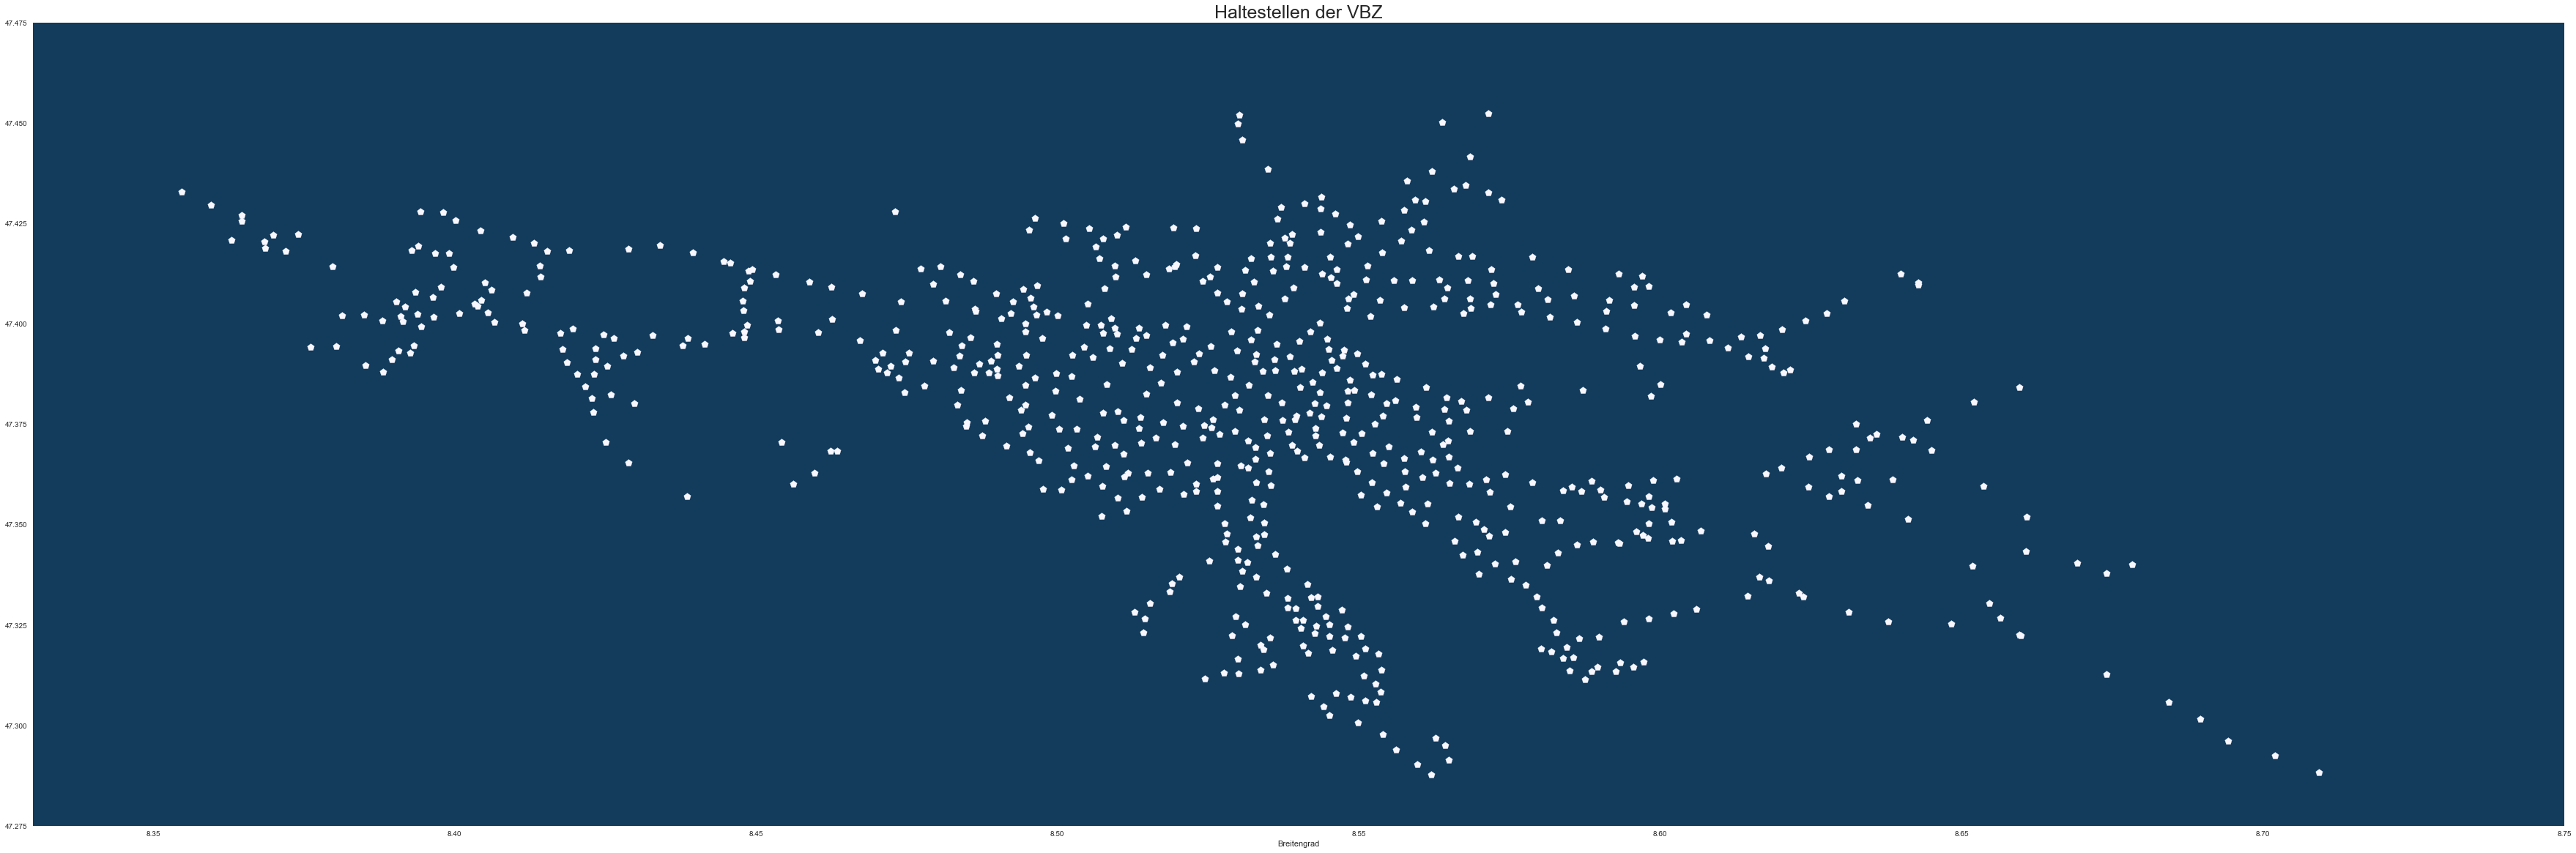

In [146]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Haltestellen der VBZ", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = ((reference_colours_star["red"]
          ,reference_colours_star["green"]
          ,reference_colours_star["blue"]
         ))

ax.scatter(df_stops.stop_lon, df_stops.stop_lat , c = colour, s = 100, marker = (5,0,1))

Abfahrten pro Jahr
==

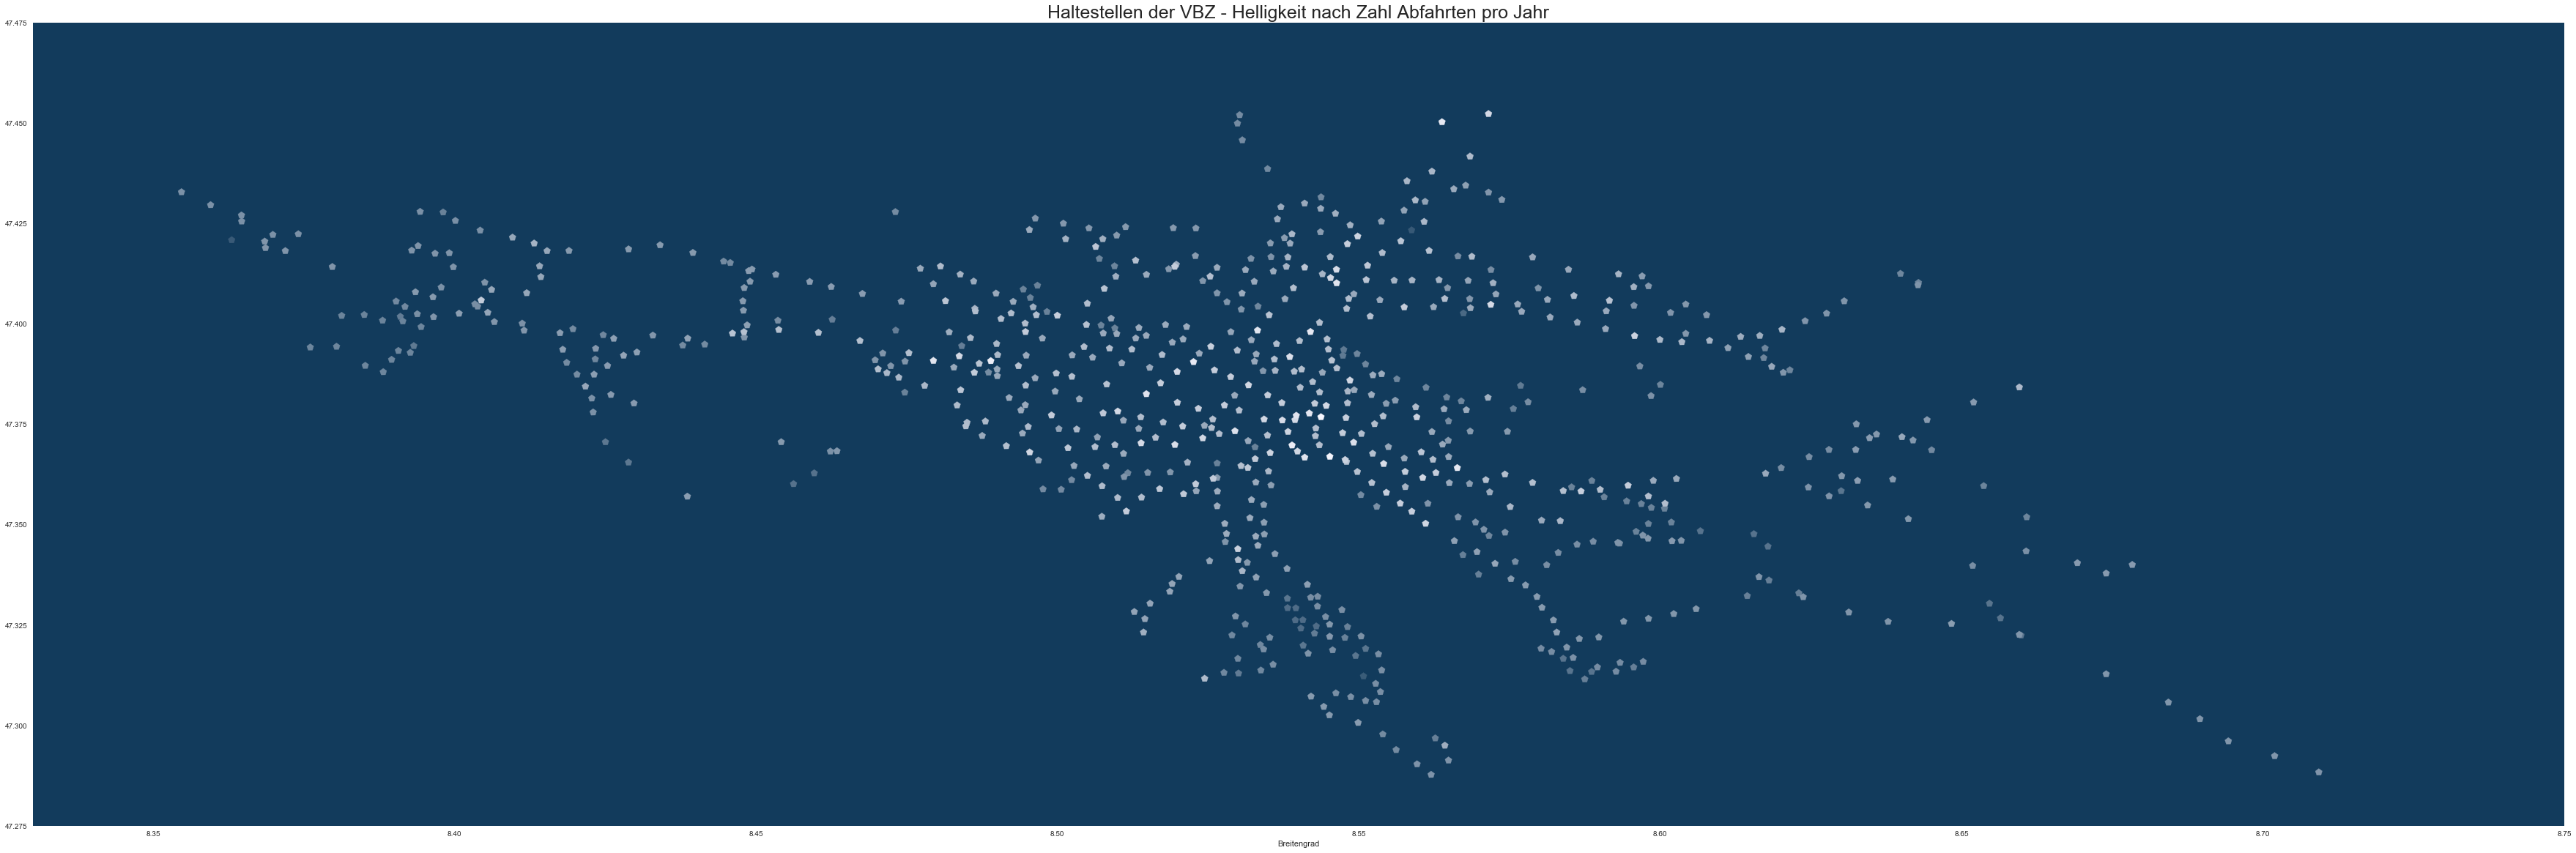

In [223]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Haltestellen der VBZ - Helligkeit nach Zahl Abfahrten pro Jahr", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
            ,entry["rgb_green"]
            ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_stops.Abfahrten_per_year_ratio
                                    ,scaling_function = lambda x: x ** (1/4)
                                   ).to_dict("records")
          ]

ax.scatter(df_stops.stop_lon, df_stops.stop_lat , c = colour, s = 100, marker = (5,0,1))

Aussteiger pro Jahr 
==

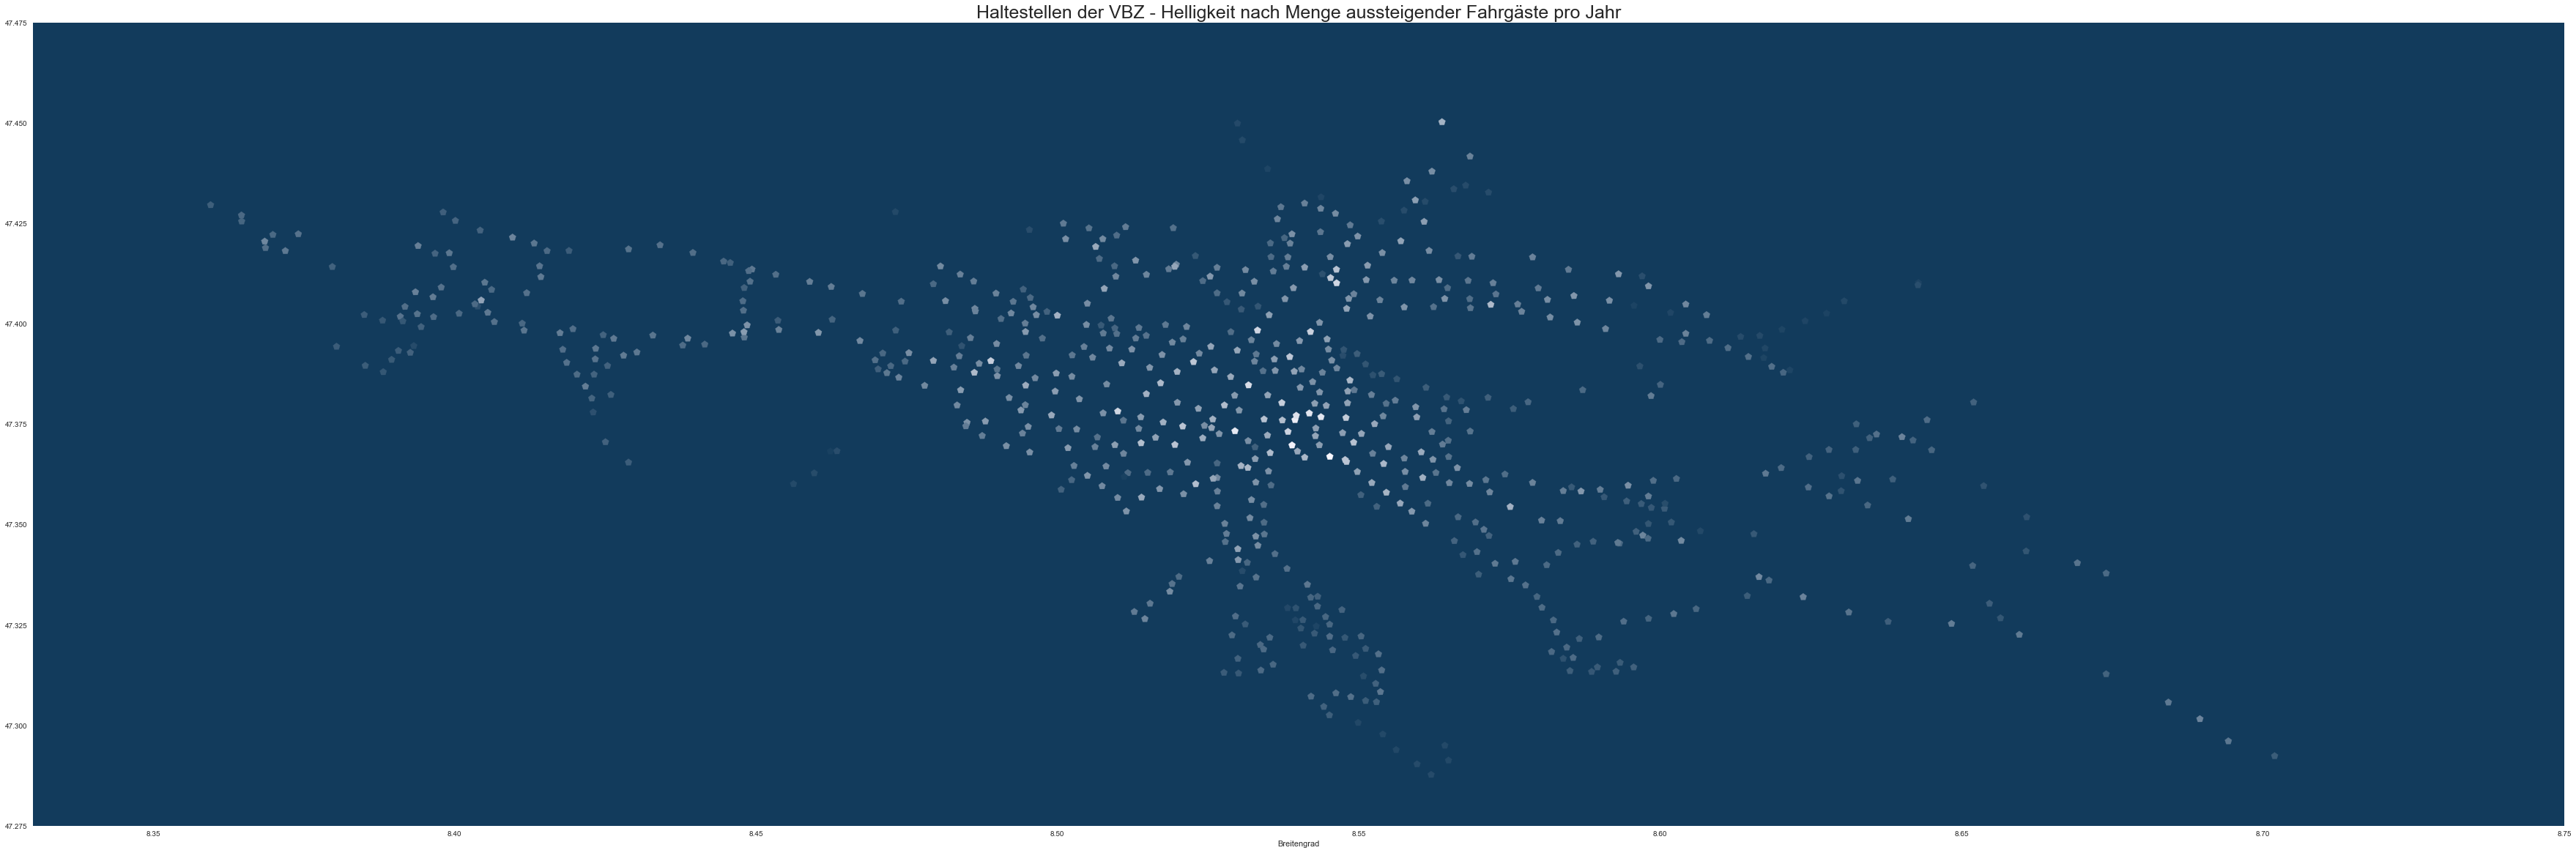

In [147]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Haltestellen der VBZ - Helligkeit nach Menge aussteigender Fahrgäste pro Jahr", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
            ,entry["rgb_green"]
            ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_stops.Aussteiger_per_year_ratio
                                    ,scaling_function = lambda x: x ** (1/4)
                                   ).to_dict("records")
          ]

ax.scatter(df_stops.stop_lon, df_stops.stop_lat , c = colour, s = 100, marker = (5,0,1))

Einsteiger pro Jahr 
==

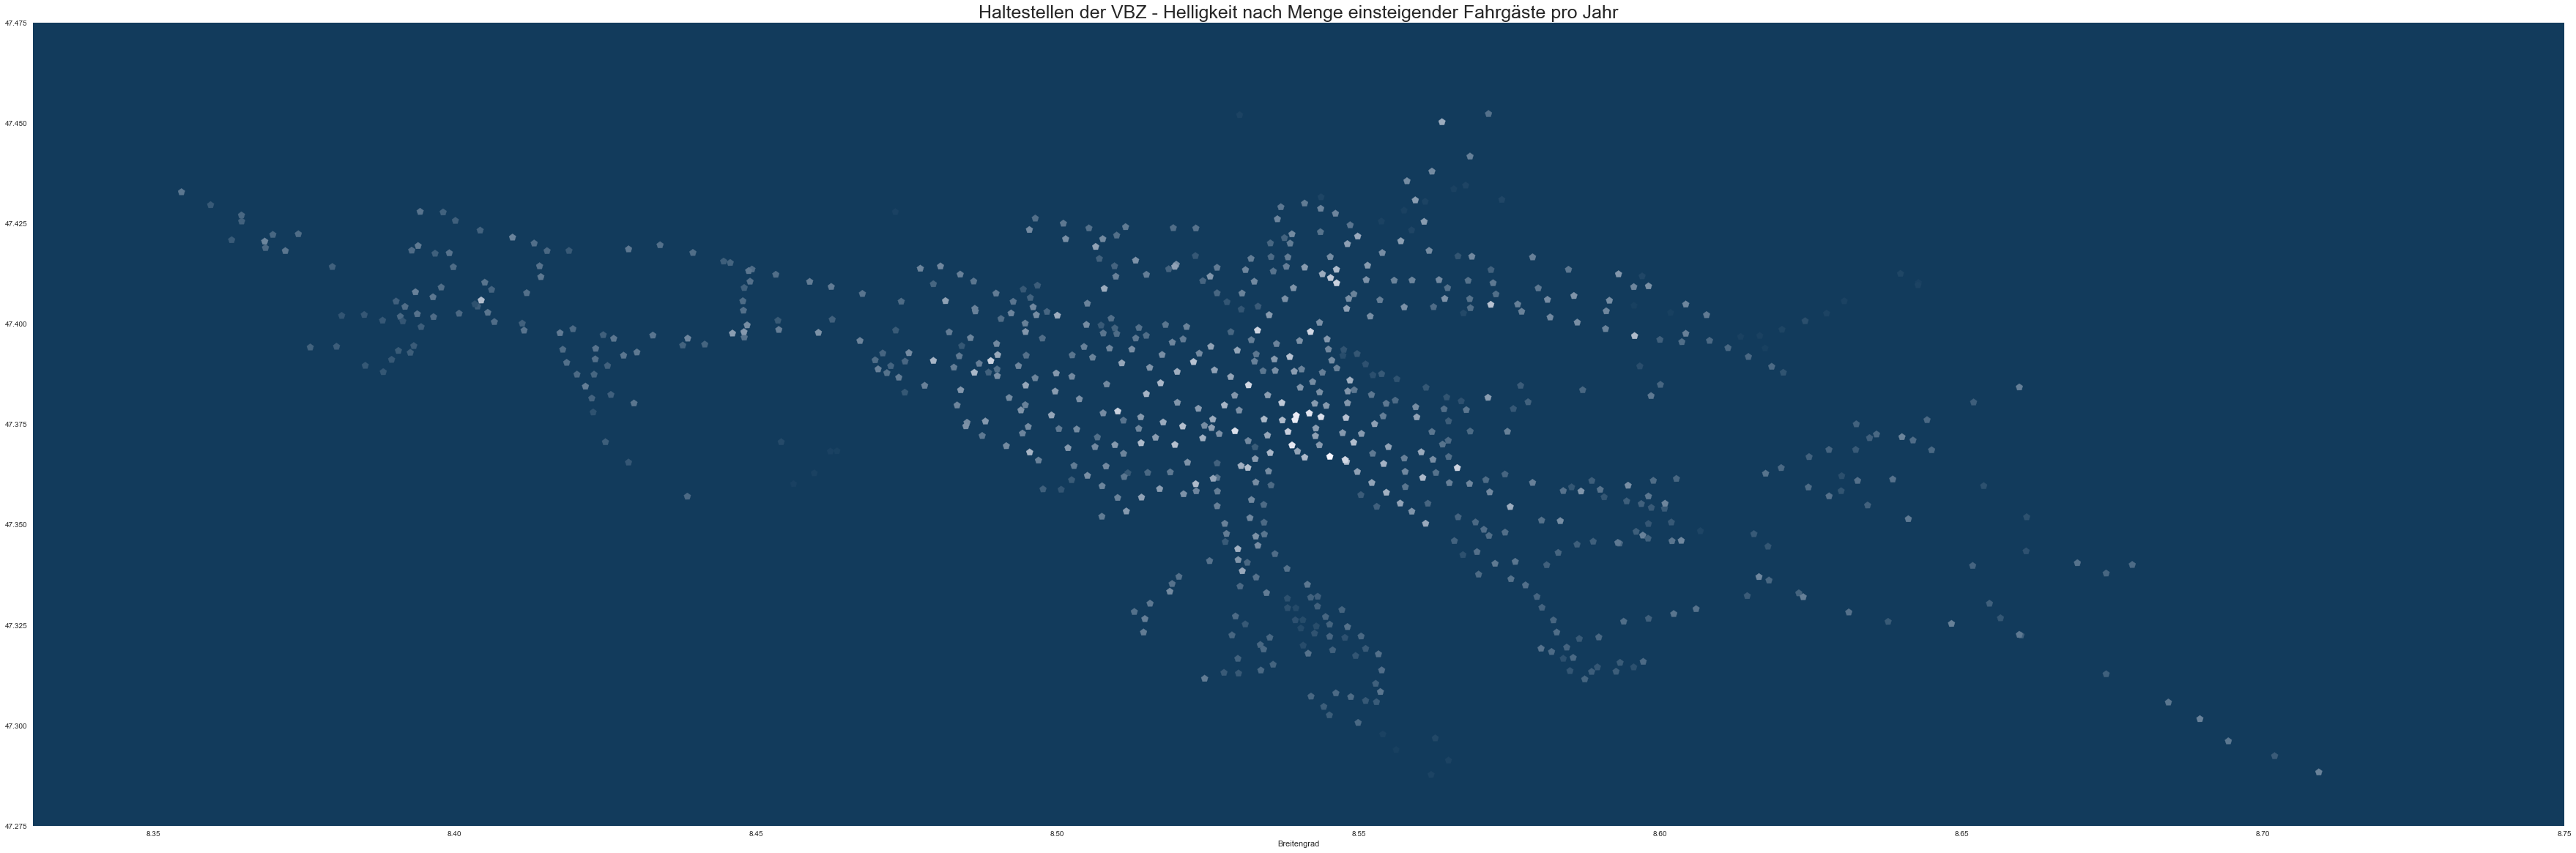

In [148]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Haltestellen der VBZ - Helligkeit nach Menge einsteigender Fahrgäste pro Jahr", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
            ,entry["rgb_green"]
            ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_stops.Einsteiger_per_year_ratio
                                    ,scaling_function = lambda x: x ** (1/4)
                                   ).to_dict("records")
          ]
ax.scatter(df_stops.stop_lon, df_stops.stop_lat , c = colour, s = 100, marker = (5,0,1))

Einsteiger pro Abfahrt 
==

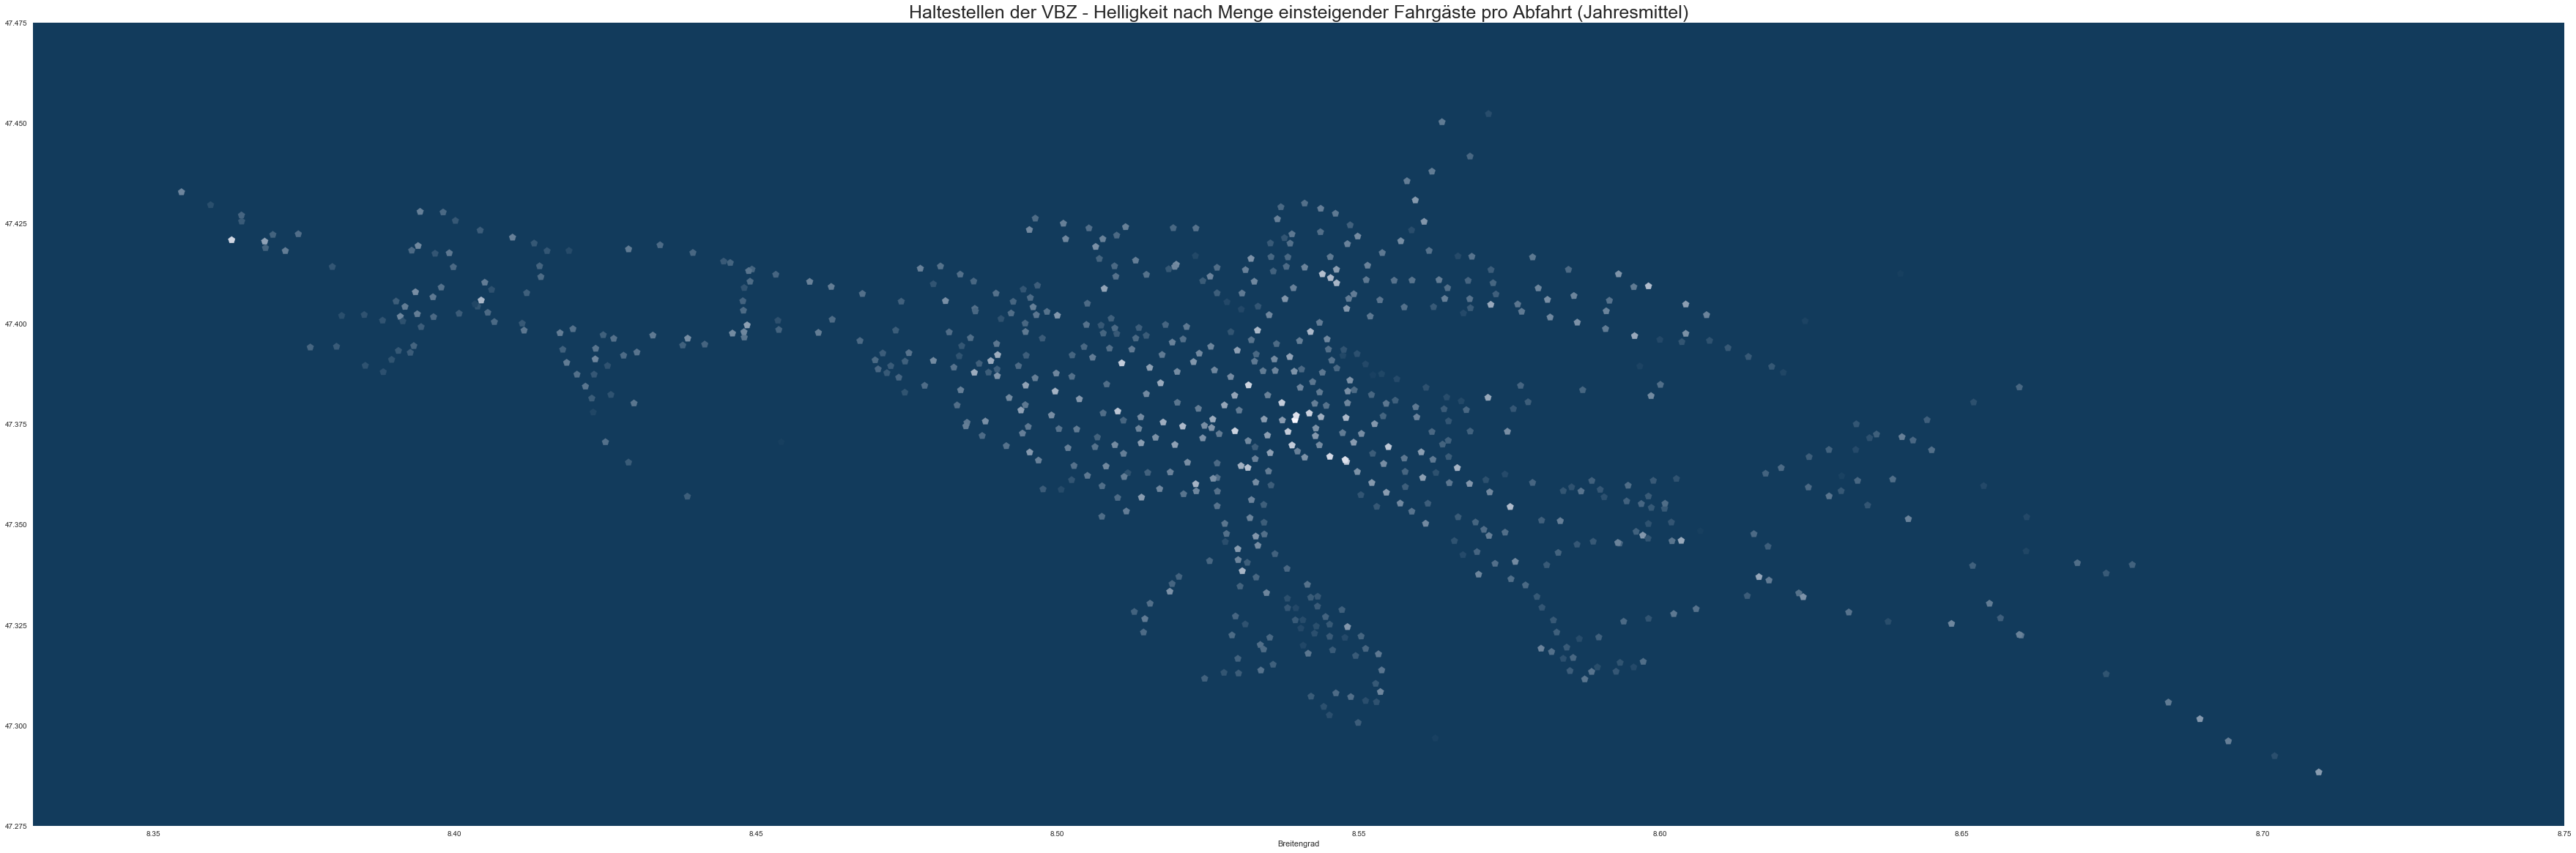

In [155]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Haltestellen der VBZ - Helligkeit nach Menge einsteigender Fahrgäste pro Abfahrt (Jahresmittel)", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
           ,entry["rgb_green"]
           ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_stops.Einsteiger_per_Abfahrt_ratio
                                    ,scaling_function = lambda x: x ** (1/2)
                                   ).to_dict("records")
          ]


ax.scatter(df_stops.stop_lon, df_stops.stop_lat , c = colour, s = 100, marker = (5,0,1))

Aussteiger pro Abfahrt
==

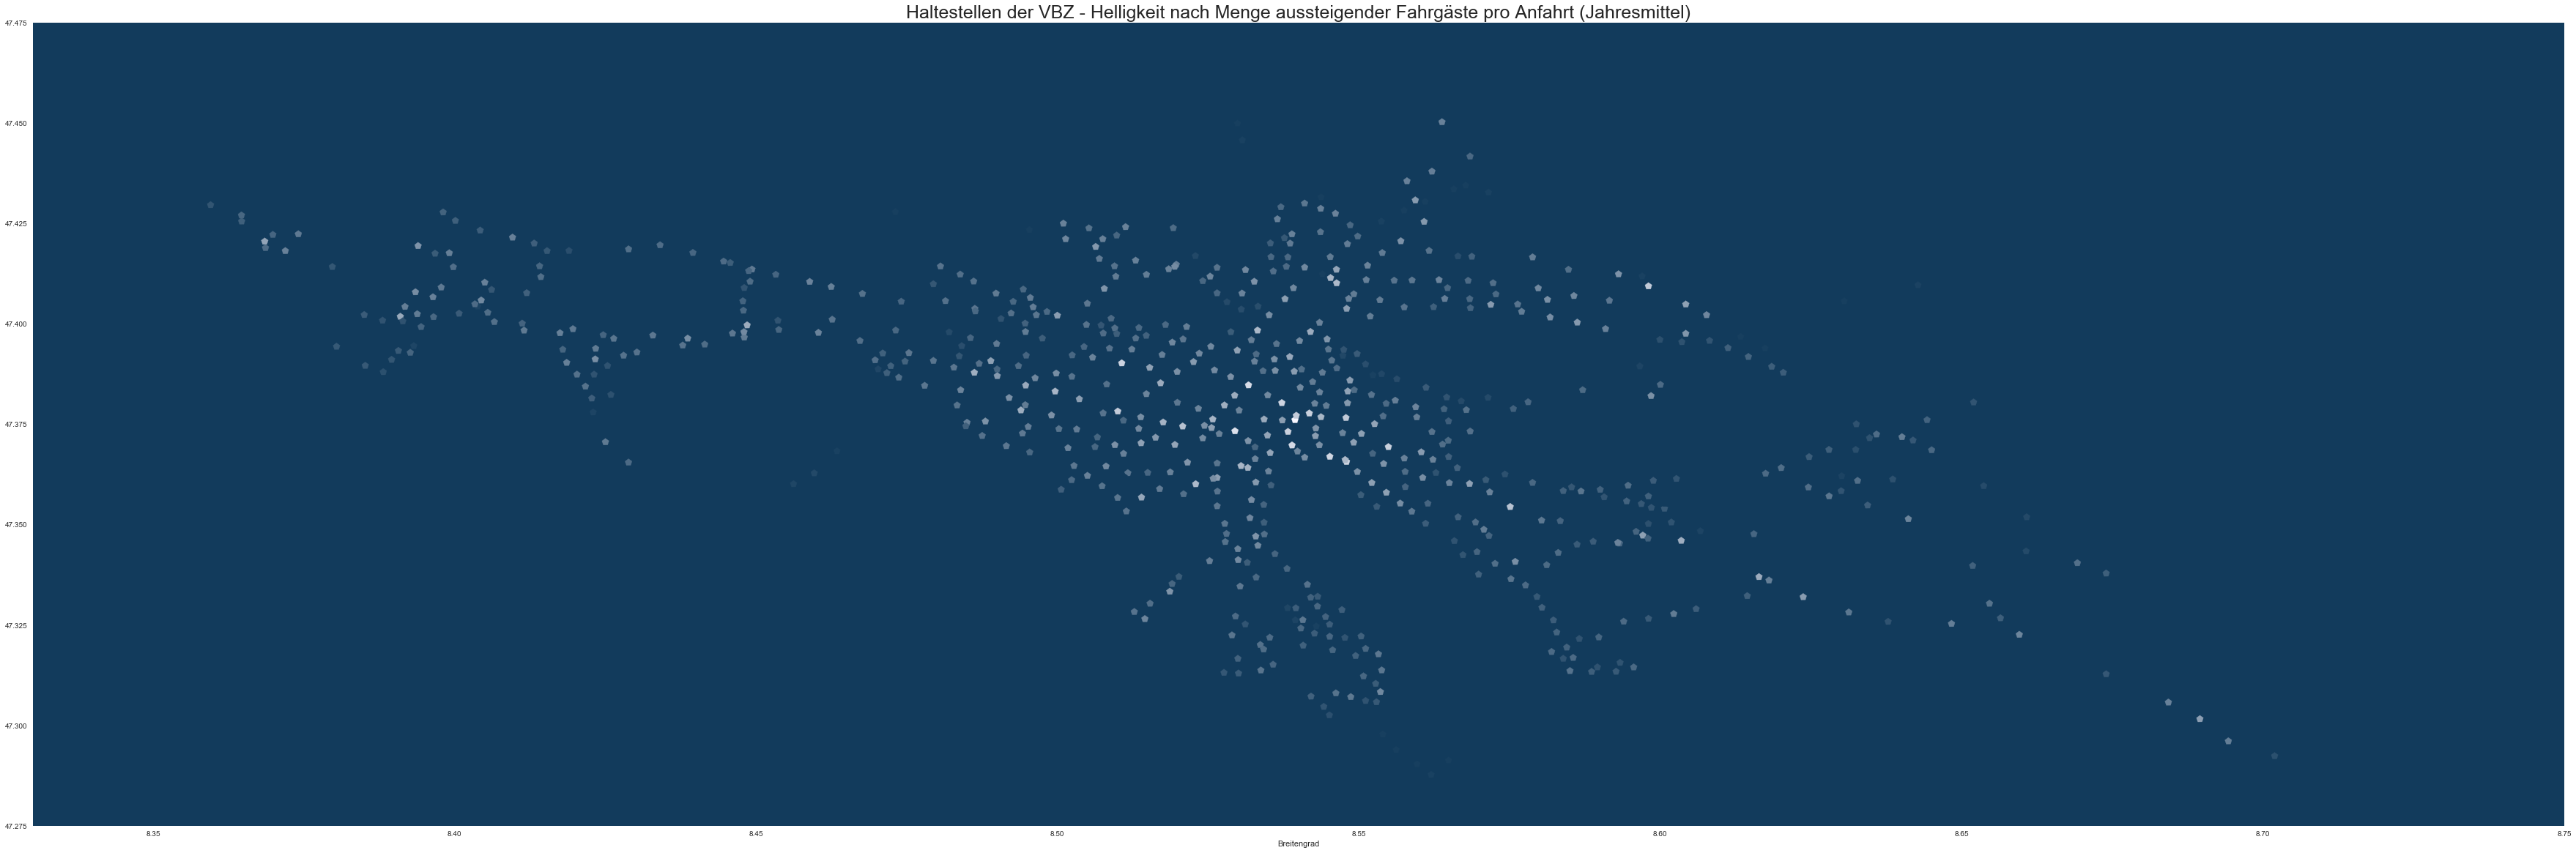

In [156]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Haltestellen der VBZ - Helligkeit nach Menge aussteigender Fahrgäste pro Anfahrt (Jahresmittel)", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
           ,entry["rgb_green"]
           ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_stops.Aussteiger_per_Abfahrt_ratio
                                    ,scaling_function = lambda x: x ** (1/2)
                                   ).to_dict("records")
          ]


ax.scatter(df_stops.stop_lon, df_stops.stop_lat , c = colour, s = 100, marker = (5,0,1))

Boxplot Ein-/Aussteiger
==

{'boxes': [<matplotlib.lines.Line2D at 0x11ab559860>,
 'caps': [<matplotlib.lines.Line2D at 0x11ab55f358>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ab5680b8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11ab55fc18>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11ab5599e8>,
  <matplotlib.lines.Line2D at 0x11ab568dd8>]}

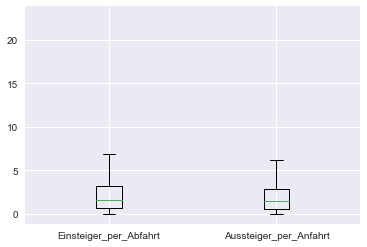

In [159]:
plt.boxplot([df_stops.Einsteiger_per_Abfahrt
             ,df_stops.Aussteiger_per_Abfahrt
            ],labels = ["Einsteiger_per_Abfahrt","Aussteiger_per_Anfahrt"]
           )

Touren - Fahrgäste pro Jahr
===

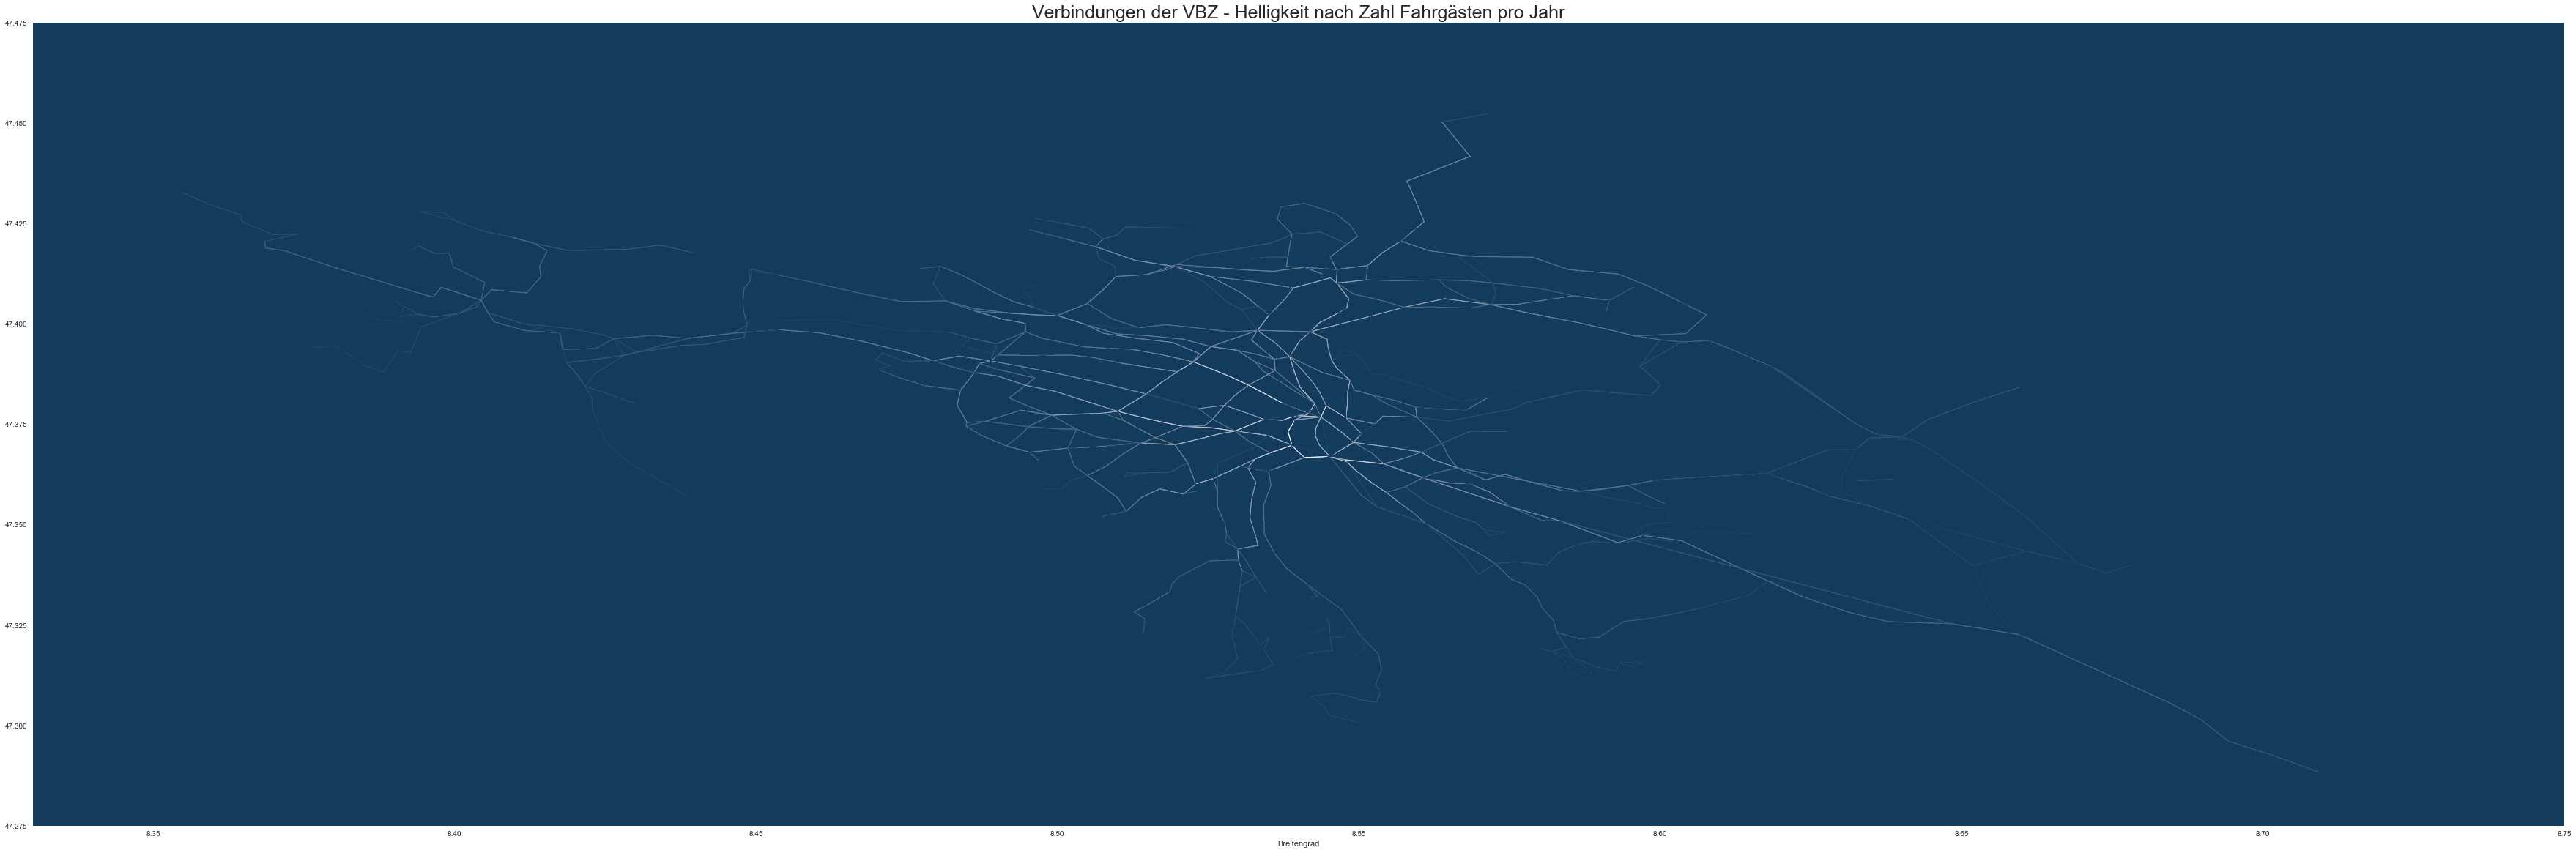

In [334]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Verbindungen der VBZ - Helligkeit nach Zahl Fahrgästen pro Jahr", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
           ,entry["rgb_green"]
           ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_tours.Besetzung_per_year_ratio
                                    ,scaling_function = lambda x: x ** (1/2)
                                   ).to_dict("records")
          ]

for i, tour in enumerate(df_tour.to_dict("records")):
    point_1=(tour["stop_lon_von"],tour["stop_lat_von"])
    point_2=(tour["stop_lon_nach"],tour["stop_lat_nach"])

    ax.plot((point_1[0],point_2[0]),(point_1[1],point_2[1]), color = colour[i], linewidth = 1, zorder = 1)

Touren - Fahrten pro Jahr
==

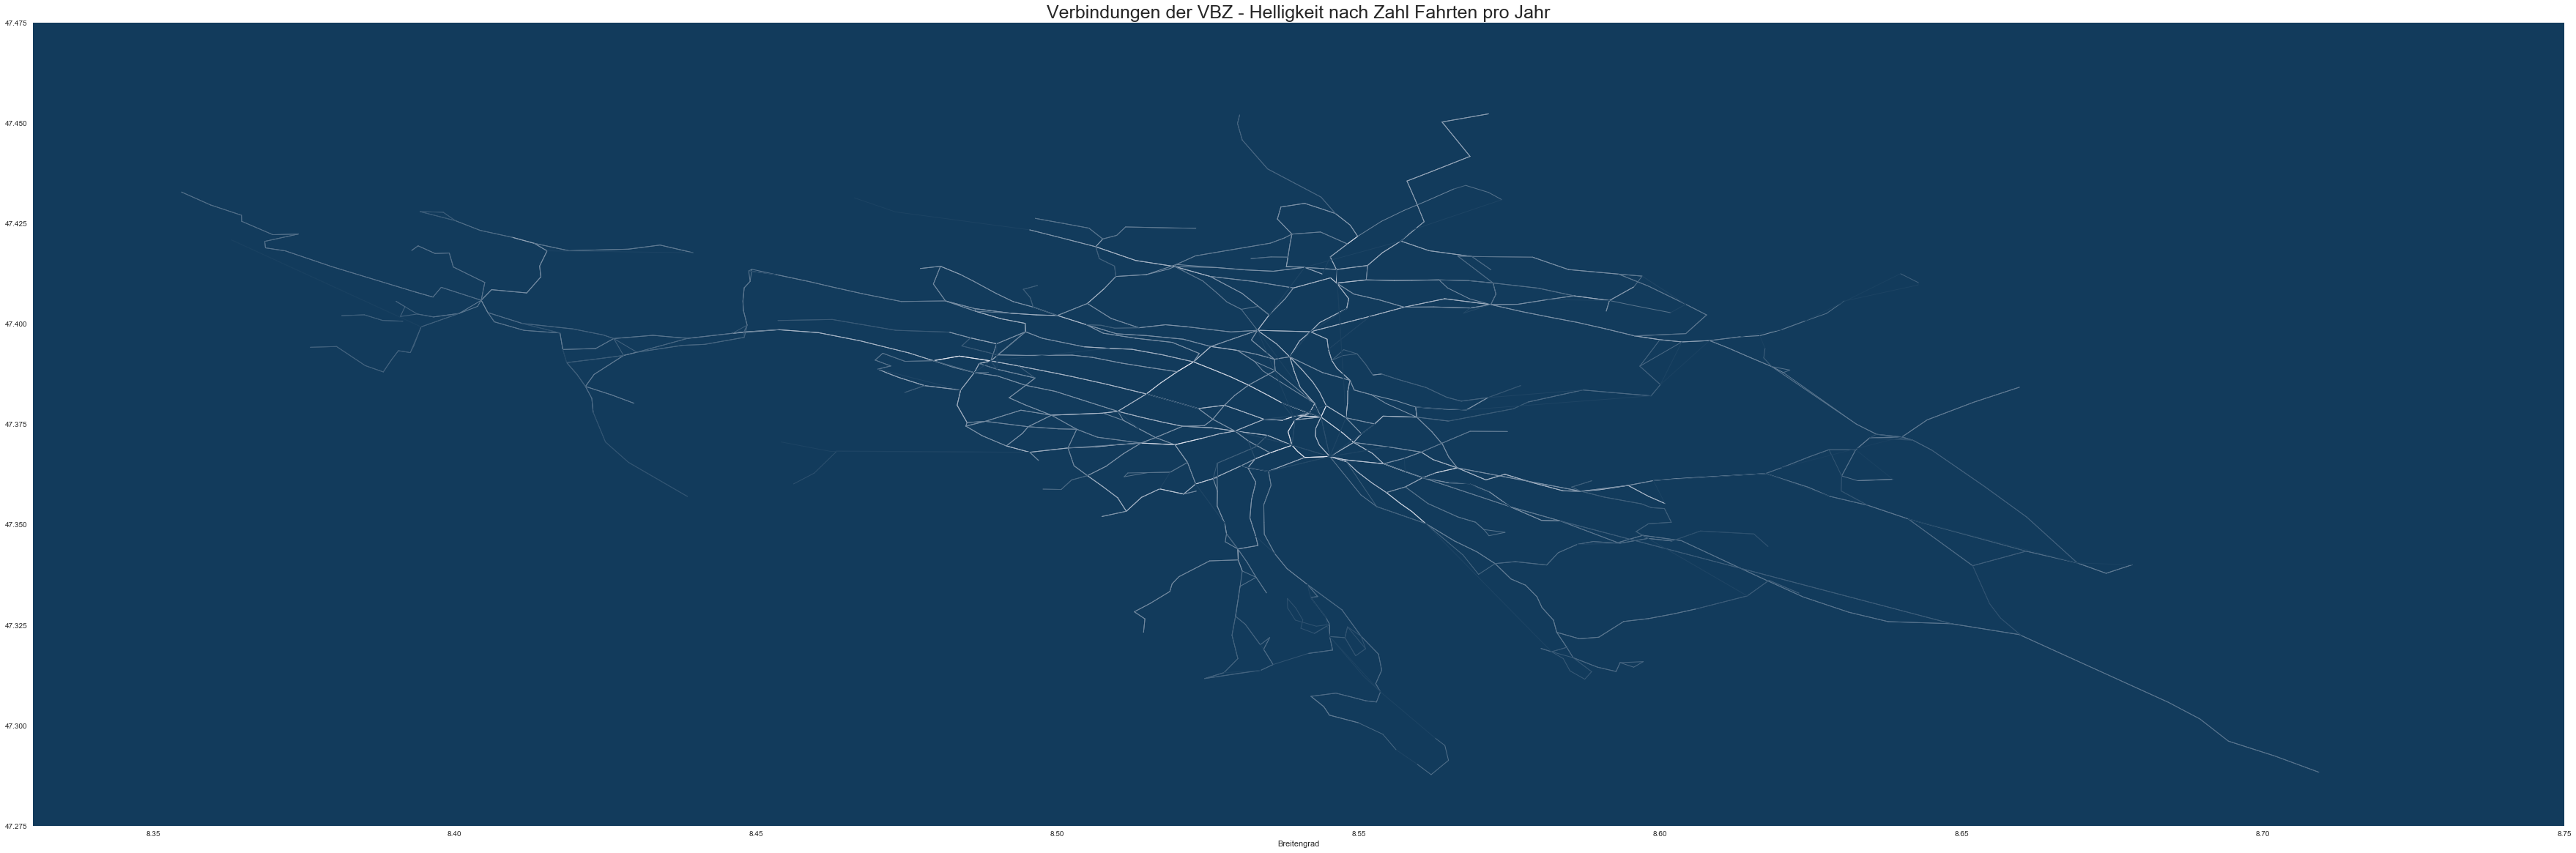

In [343]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Verbindungen der VBZ - Helligkeit nach Zahl Fahrten pro Jahr", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
           ,entry["rgb_green"]
           ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_tours.Fahrten_per_year_ratio
                                    ,scaling_function = lambda x: x ** (1/2)
                                   ).to_dict("records")
          ]

for i, tour in enumerate(df_tour.to_dict("records")):
    point_1=(tour["stop_lon_von"],tour["stop_lat_von"])
    point_2=(tour["stop_lon_nach"],tour["stop_lat_nach"])

    ax.plot((point_1[0],point_2[0]),(point_1[1],point_2[1]), color = colour[i], linewidth = 1, zorder = 1)

Touren - Fahrgäste pro Abfahrt
==

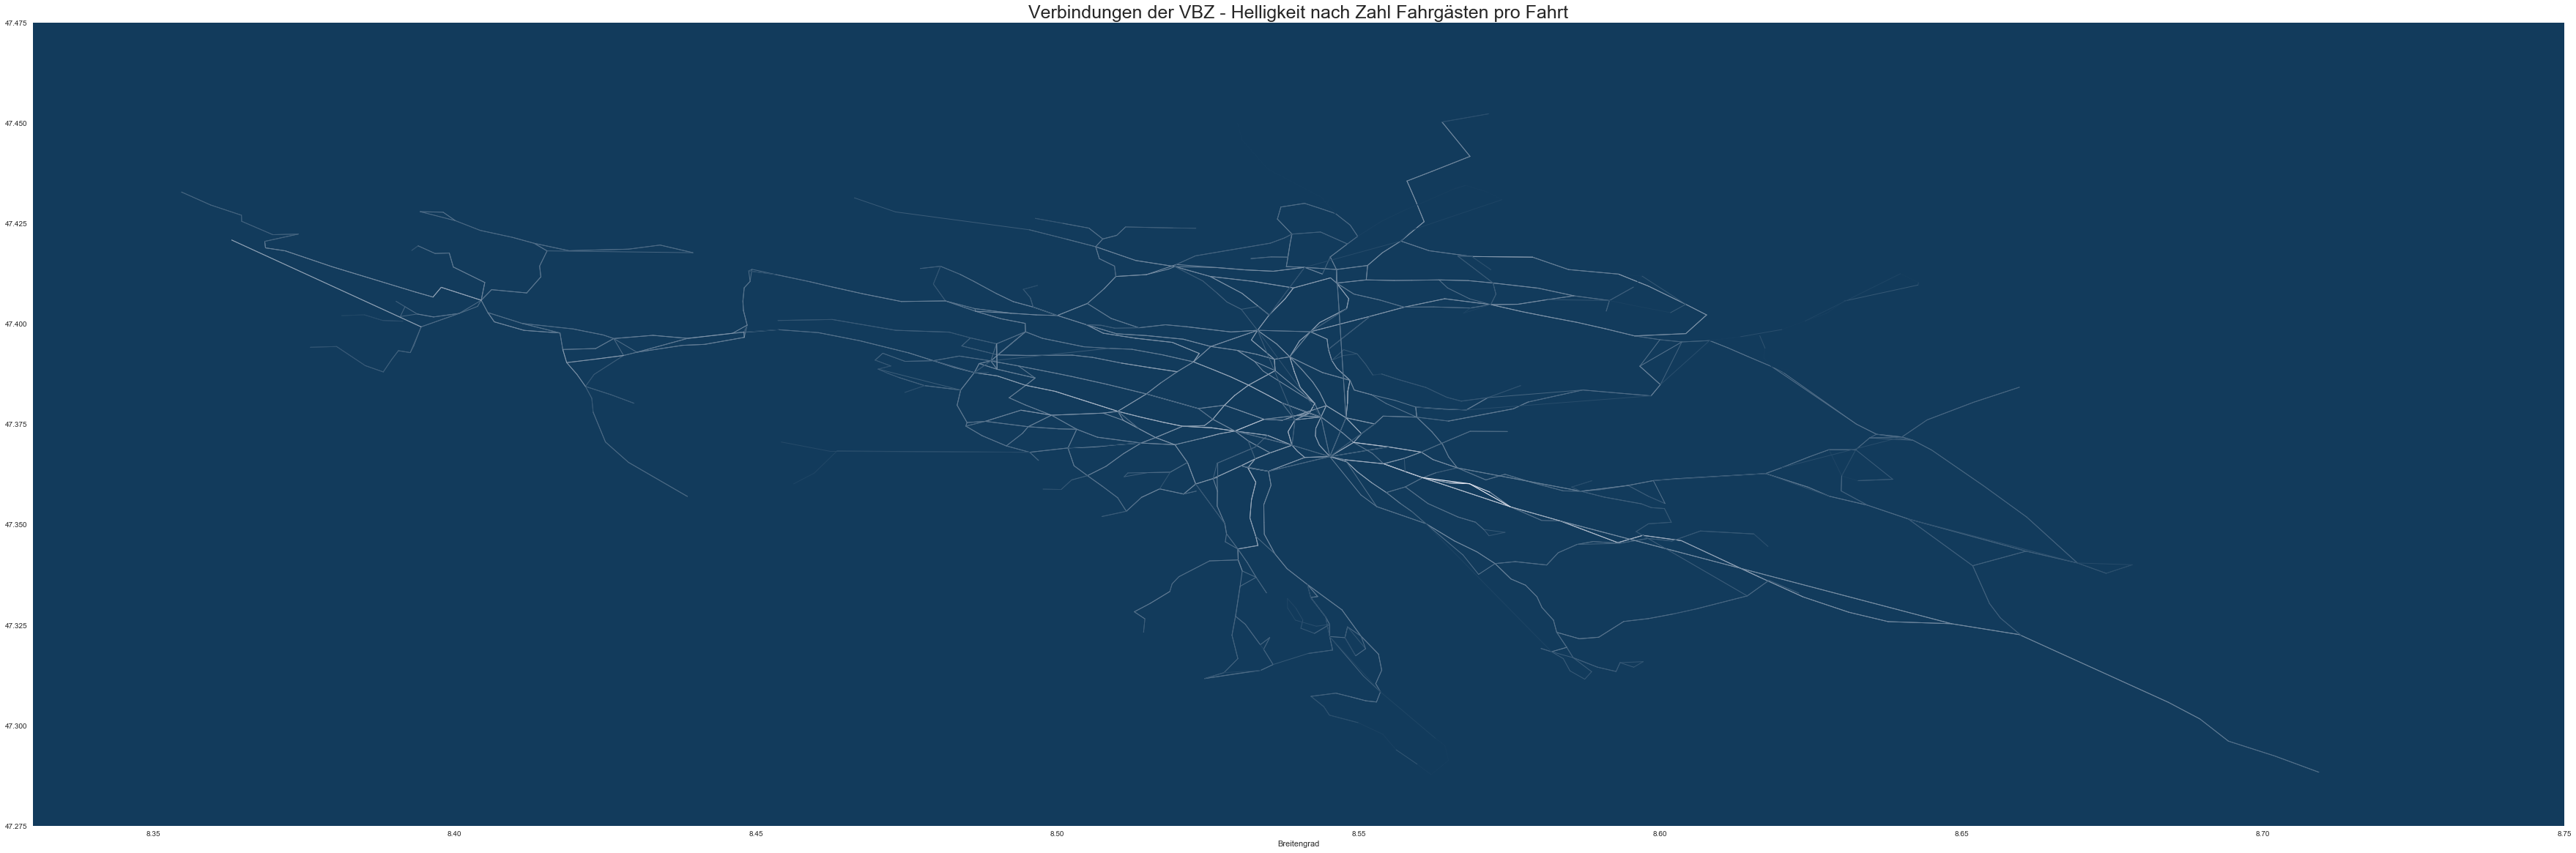

In [337]:
reference_colours_sky = dict()
reference_colours_sky["red"] =    0.07 
reference_colours_sky["green"] =  0.23 
reference_colours_sky["blue"] =  0.36 
reference_colours_star= dict()
reference_colours_star["red"] =  248/255
reference_colours_star["green"] =  247/255
reference_colours_star["blue"] =  255/255


borders_lon = (8.33,8.75)
borders_lat = (47.275,47.475)
rectangle_canvas = get_matplotlib_rectangle(borders_lon[0], borders_lon[1], borders_lat[0], borders_lat[1])

ax = plt.axes(rectangle_canvas)
ax.set_xlim(borders_lon[0], borders_lon[1])
ax.set_ylim(borders_lat[0], borders_lat[1])
ax.set_title("Verbindungen der VBZ - Helligkeit nach Zahl Fahrgästen pro Fahrt", fontdict = {'fontsize': 25})
ax.grid()
ax.set_xlabel("Längengrad")
ax.set_xlabel("Breitengrad")
ax.set_facecolor((reference_colours[("sky","red")]
                  , reference_colours[("sky","green")]
                  , reference_colours[("sky","blue")]
                 ))

colour = [(entry["rgb_red"]
           ,entry["rgb_green"]
           ,entry["rgb_blue"]) 
           for entry in get_colours(reference_colours_sky
                                    ,reference_colours_star
                                    ,df_tours.Besetzung_per_Fahrt_ratio
                                    ,scaling_function = lambda x: x ** (1/2)
                                   ).to_dict("records")
          ]

for i, tour in enumerate(df_tour.to_dict("records")):
    point_1=(tour["stop_lon_von"],tour["stop_lat_von"])
    point_2=(tour["stop_lon_nach"],tour["stop_lat_nach"])

    ax.plot((point_1[0],point_2[0]),(point_1[1],point_2[1]), color = colour[i], linewidth = 1, zorder = 1)

In [339]:
df_tours.sort_values(by="Besetzung_per_Fahrt_ratio", ascending = False)[:10]

stop_name_von  stop_lat_von  stop_lon_von  \
1727   Zürich, Hegibachplatz      47.36165     8.5606174   
1726    Zürich, Wetlistrasse     47.360143     8.5683827   
1243     Zürich, Hedwigsteig     47.360347      8.565023   
1242    Zürich, Wetlistrasse     47.360143     8.5683827   
760        Zürich, Kunsthaus     47.370432     8.5491543   
758   Zürich, Hottingerplatz     47.369319      8.554917   
912         Zürich, Balgrist     47.354415     8.5751291   
894       Zürich, Kreuzplatz     47.365114     8.5541336   
219    Zürich, Sihlpost / HB     47.376198     8.5342916   
897    Zürich, Hegibachplatz      47.36165     8.5606174   

              stop_name_nach  stop_lat_nach  stop_lon_nach  \
1727    Zürich, Wetlistrasse      47.360143      8.5683827   
1726        Zürich, Balgrist      47.354415      8.5751291   
1243    Zürich, Wetlistrasse      47.360143      8.5683827   
1242        Zürich, Burgwies      47.358068      8.5717244   
760   Zürich, Hottingerplatz      47.369319       8.554917   
758        Zürich, Kunsthaus      47.370432      8.5491543   
912    Zürich, Hegibachplatz       47.36165      8.5606174   
894    Zürich, Hegibachplatz       47.36165      8.5606174   
219      Zürich, Stauffacher      47.373267      8.5294587   
897         Zürich, Balgrist      47.354415      8.5751291   

      abfahrten_per_year stop_kuerzel_von stop_kuerzel_nach  \
1727                 140             HEGI              WETL   
1726                 140             WETL              BALG   
1243               16092             HEDW              WETL   
1242               16092             WETL              BURG   
760                44233             KUNS              HOTT   
758                44664             HOTT              KUNS   
912                29295             BALG              HEGI   
894                29648             KREU              HEGI   
219                94760             SIHP              STAU   
897                29508             HEGI              BALG   

      Besetzung_per_year  Besetzung_per_Fahrt  Besetzung_per_year_ratio  \
1727               21321            152.29286              0.0020076031   
1726               20672            147.65714              0.0019464927   
1243             1998039             124.1635                0.18813702   
1242             1742487            108.28281                0.16407403   
760              3432096            77.591301                0.32316902   
758              3400377            76.132389                0.32018233   
912              2225862            75.980952                0.20958902   
894              2249695            75.880161                0.21183315   
219              7135000            75.295483                0.67183754   
897              2191830            74.279179                0.20638454   

      Fahrten_per_year_ratio  Besetzung_per_Fahrt_ratio  
1727            0.0005881834                        1.0  
1726            0.0005881834                 0.96956053  
1243              0.06760748                 0.81529429  
1242              0.06760748                 0.71101701  
760               0.18583654                 0.50948746  
758               0.18764731                 0.49990781  
912               0.12307738                 0.49891343  
894               0.12456044                 0.49825161  
219               0.39811613                 0.49441244  
897               0.12397225                 0.48773908

Haltestellen - Vergleich Einsteiger & Aussteiger
==

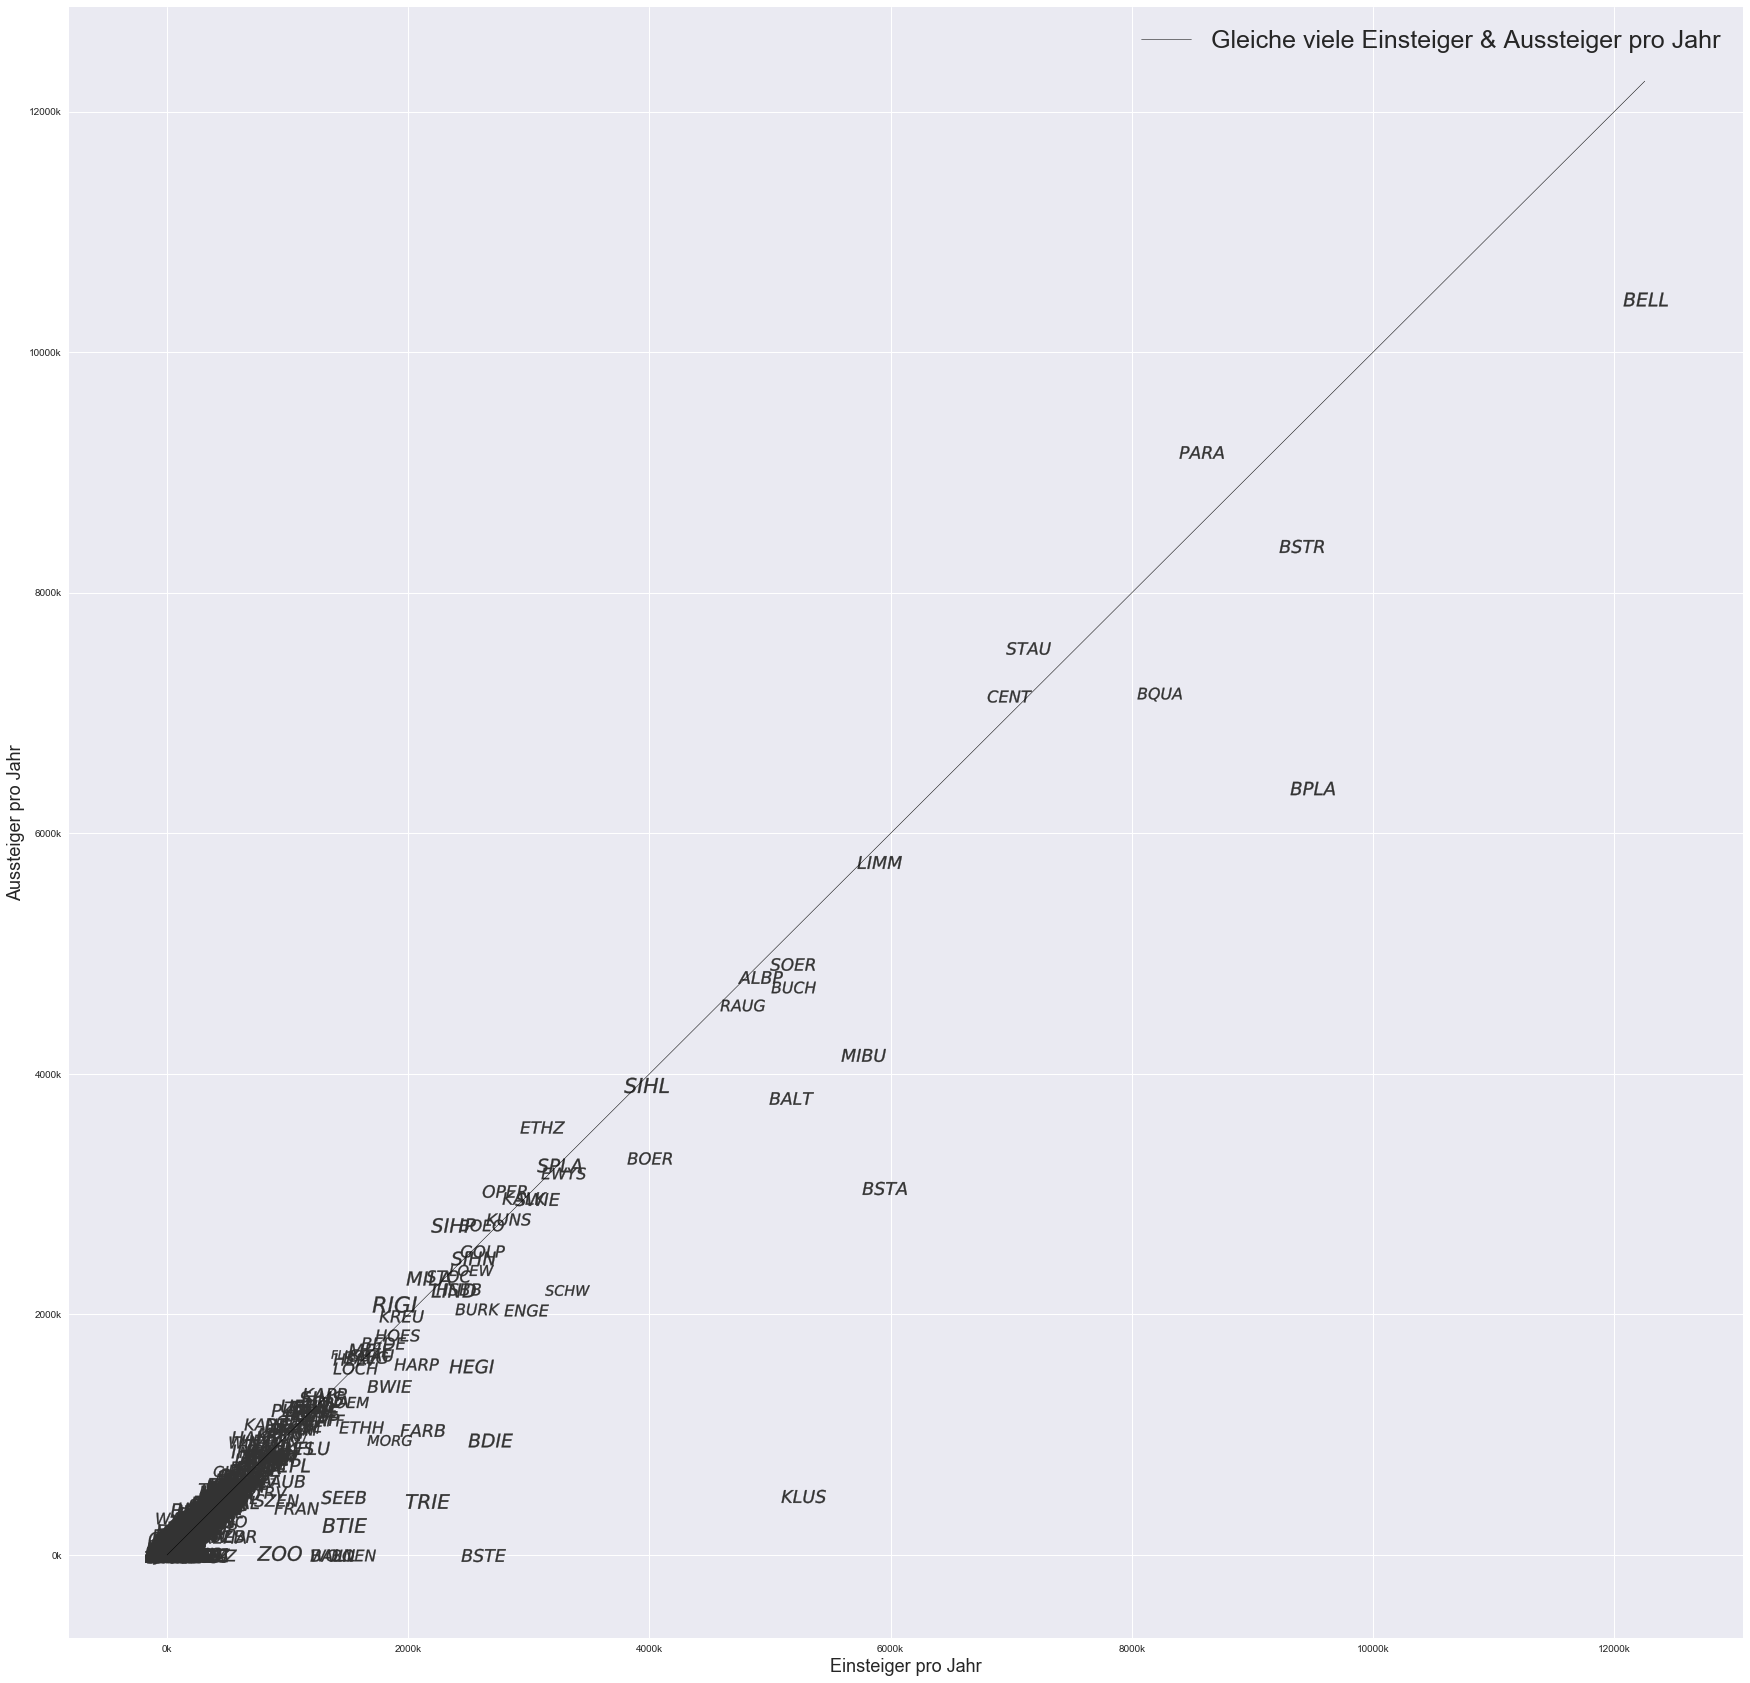

In [352]:
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111)

ax.set_xlabel("Einsteiger pro Jahr", fontsize=18)
ax.set_ylabel("Aussteiger pro Jahr", fontsize=18)
ax.xaxis.set_major_formatter(formatter_thousands)
ax.yaxis.set_major_formatter(formatter_thousands)

point_1=(0,0)
point_2=(max(df_stops.Einsteiger_per_year.max(),df_stops.Aussteiger_per_year.max())
         ,max(df_stops.Einsteiger_per_year.max(),df_stops.Aussteiger_per_year.max())
        )
         
plt.plot((point_1[0],point_2[0]),(point_1[1],point_2[1]), color = ((0,0,0)), linewidth = 0.5, zorder = 1)
ax.legend(["Gleiche viele Einsteiger & Aussteiger pro Jahr"], fontsize = 25)#, loc = 2)


for stop in df_stops.to_dict("records"):
    name = f"{stop['stop_kuerzel']}"
    ax.scatter([stop["Einsteiger_per_year"]]
               ,[stop["Aussteiger_per_year"]]
               ,c = (0.2,0.2,0.2)
               ,marker = f"${name}$"
              , s = 2000)
   


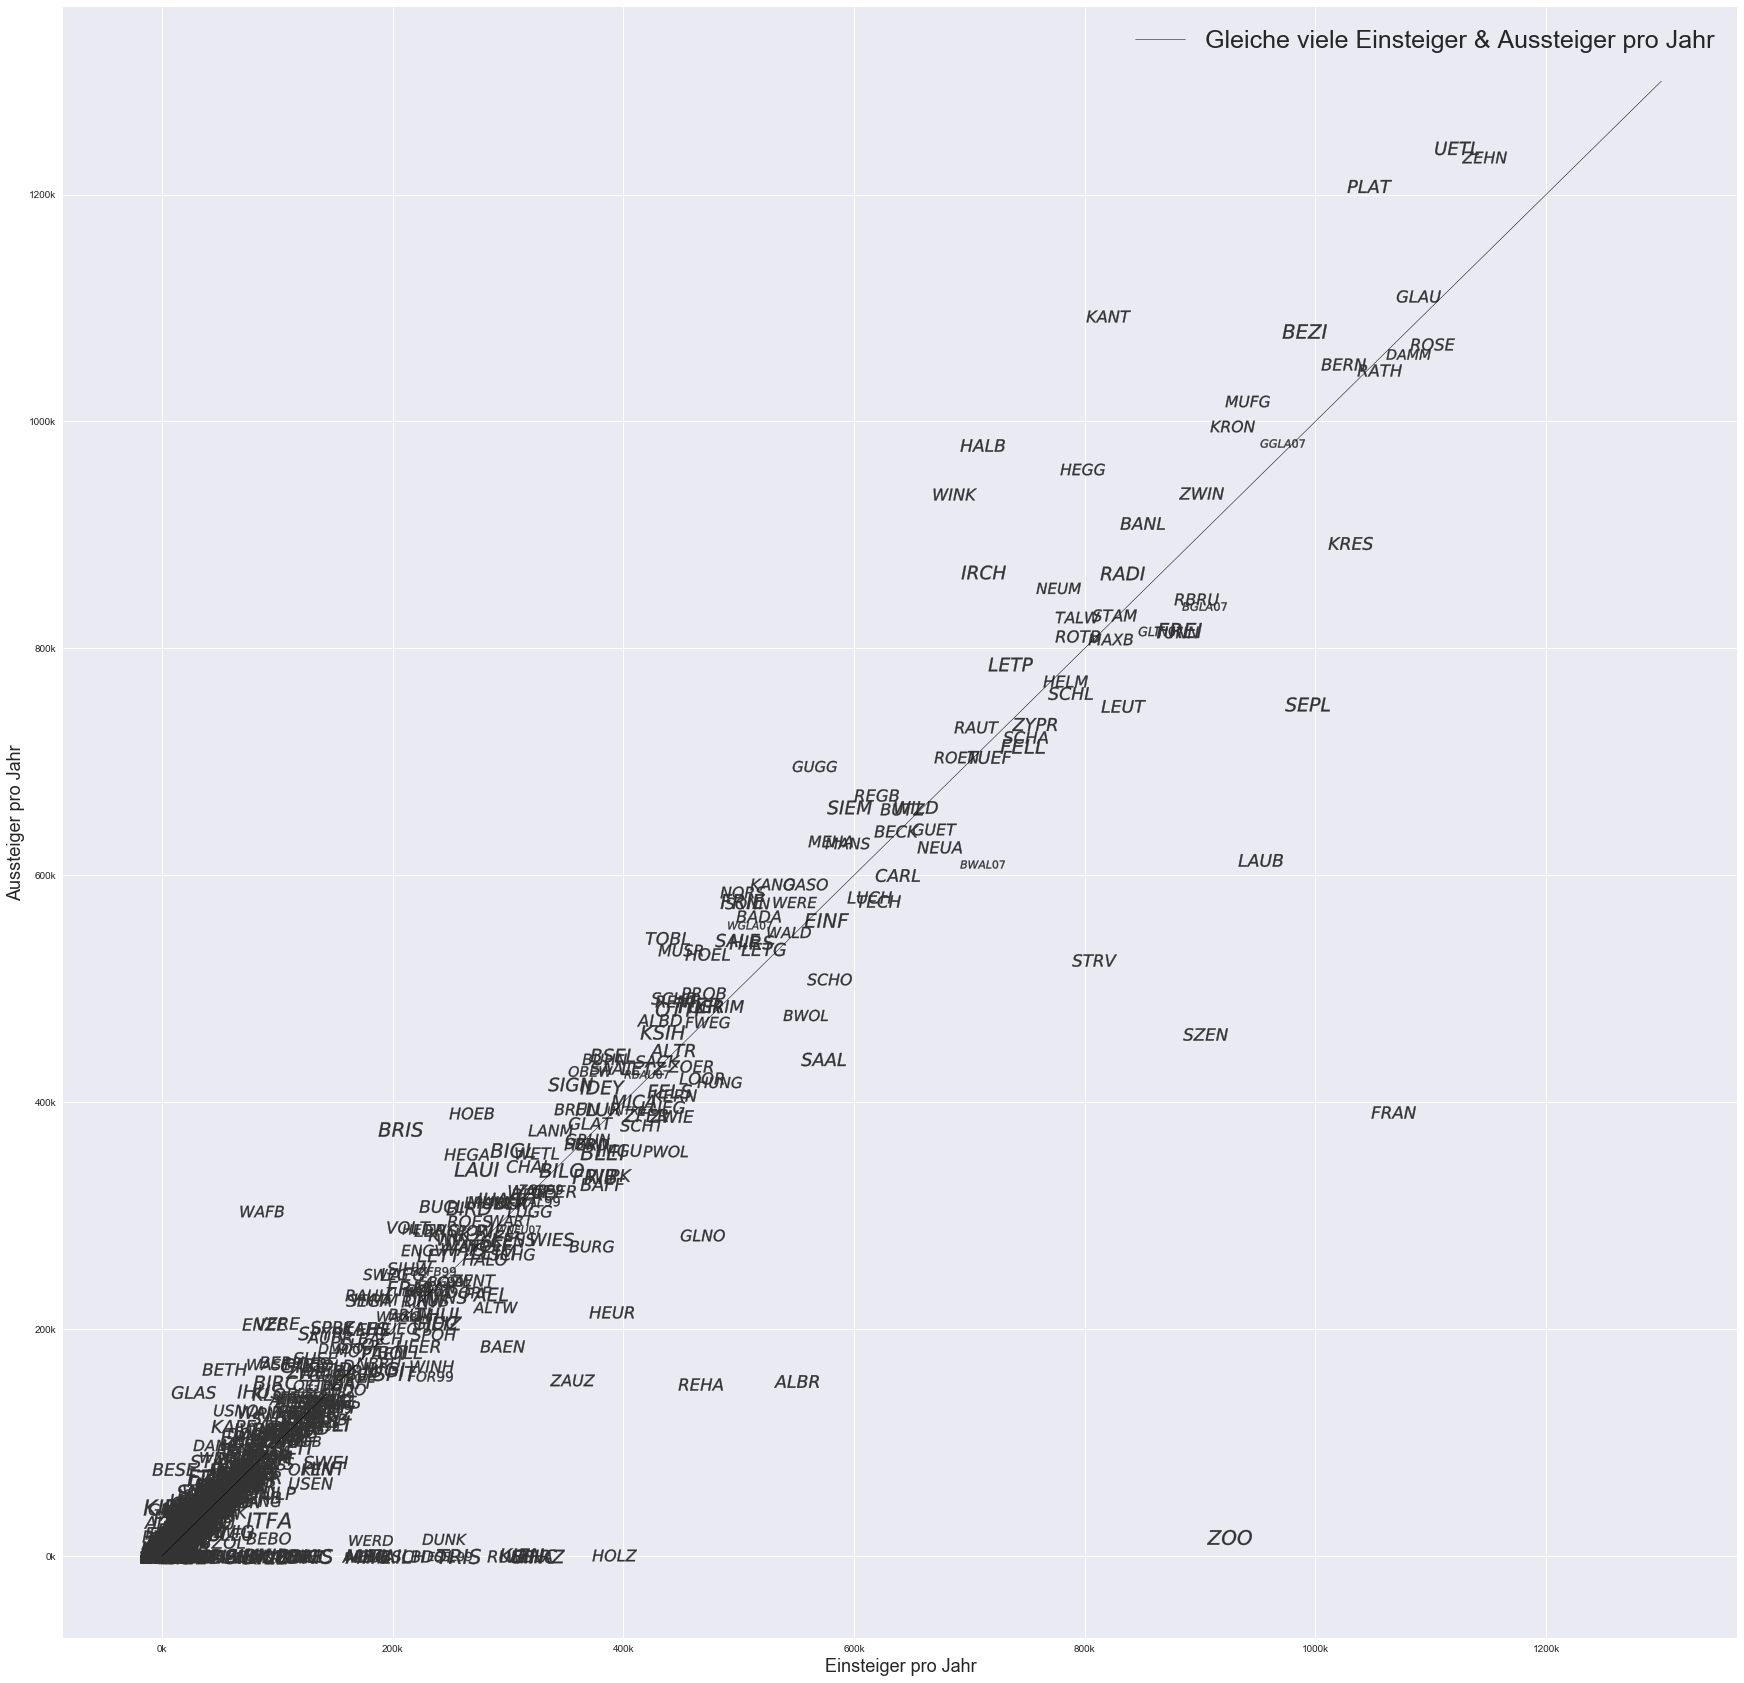

In [353]:
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111)

ax.set_xlabel("Einsteiger pro Jahr", fontsize=18)
ax.set_ylabel("Aussteiger pro Jahr", fontsize=18)
ax.xaxis.set_major_formatter(formatter_thousands)
ax.yaxis.set_major_formatter(formatter_thousands)

point_1=(0,0)
point_2=(1300000,1300000)
         
plt.plot((point_1[0],point_2[0]),(point_1[1],point_2[1]), color = ((0,0,0)), linewidth = 0.5, zorder = 1)
ax.legend(["Gleiche viele Einsteiger & Aussteiger pro Jahr"], fontsize = 25)


for stop in df_stops.sort_values(by="Einsteiger_per_year")[0:math.floor(len(df_stops)*0.9)].to_dict("records"):
    name = f"{stop['stop_kuerzel']}"
    ax.scatter([stop["Einsteiger_per_year"]]
               ,[stop["Aussteiger_per_year"]]
               ,c = (0.2,0.2,0.2)
               ,marker = f"${name}$"
              , s = 2000)

Haltestellen - Vergleich Abfahrten & Einsteiger
==

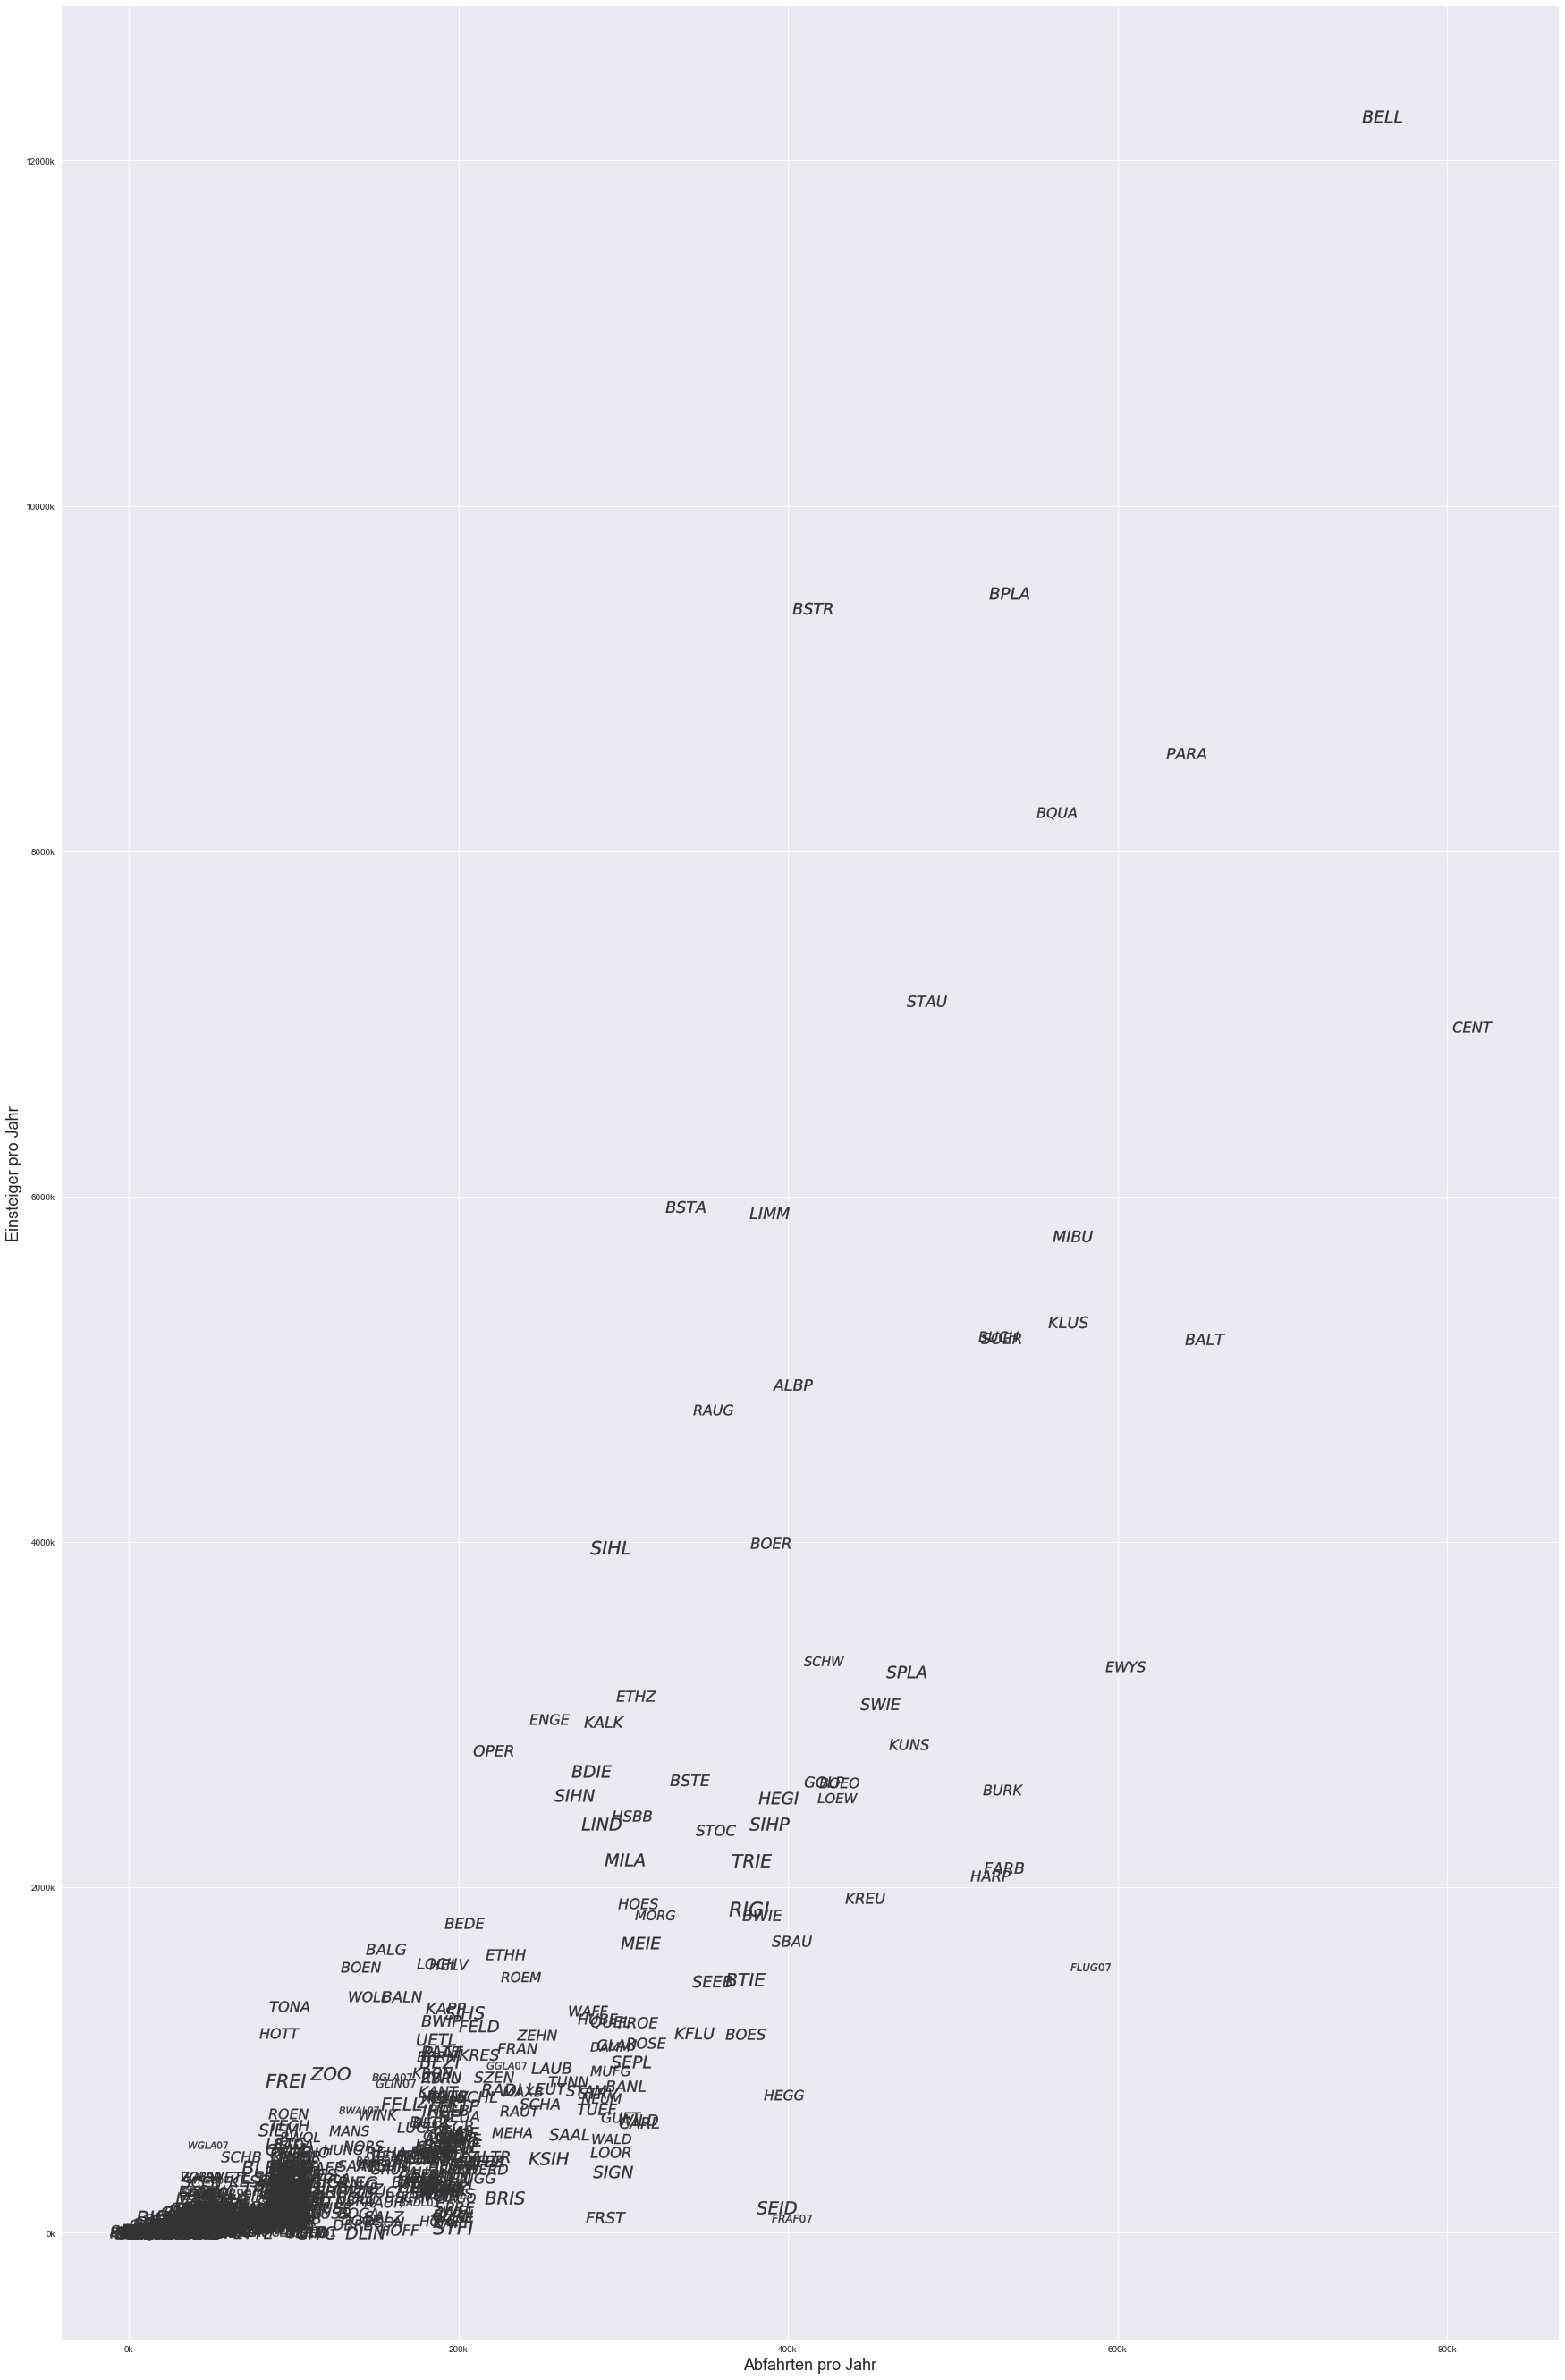

In [351]:
fig = plt.figure(figsize = (30,48))
ax = fig.add_subplot(111)

ax.set_xlabel("Abfahrten pro Jahr", fontsize=18)
ax.set_ylabel("Einsteiger pro Jahr", fontsize=18)
ax.xaxis.set_major_formatter(formatter_thousands)
ax.yaxis.set_major_formatter(formatter_thousands)


for stop in df_stops.to_dict("records"):
    name = f"{stop['stop_kuerzel']}"
    ax.scatter([stop["abfahrten_per_year"]]
               ,[stop["Einsteiger_per_year"]]
               ,c = (0.2,0.2,0.2)
               ,marker = f"${name}$"
              , s = 2000)
   


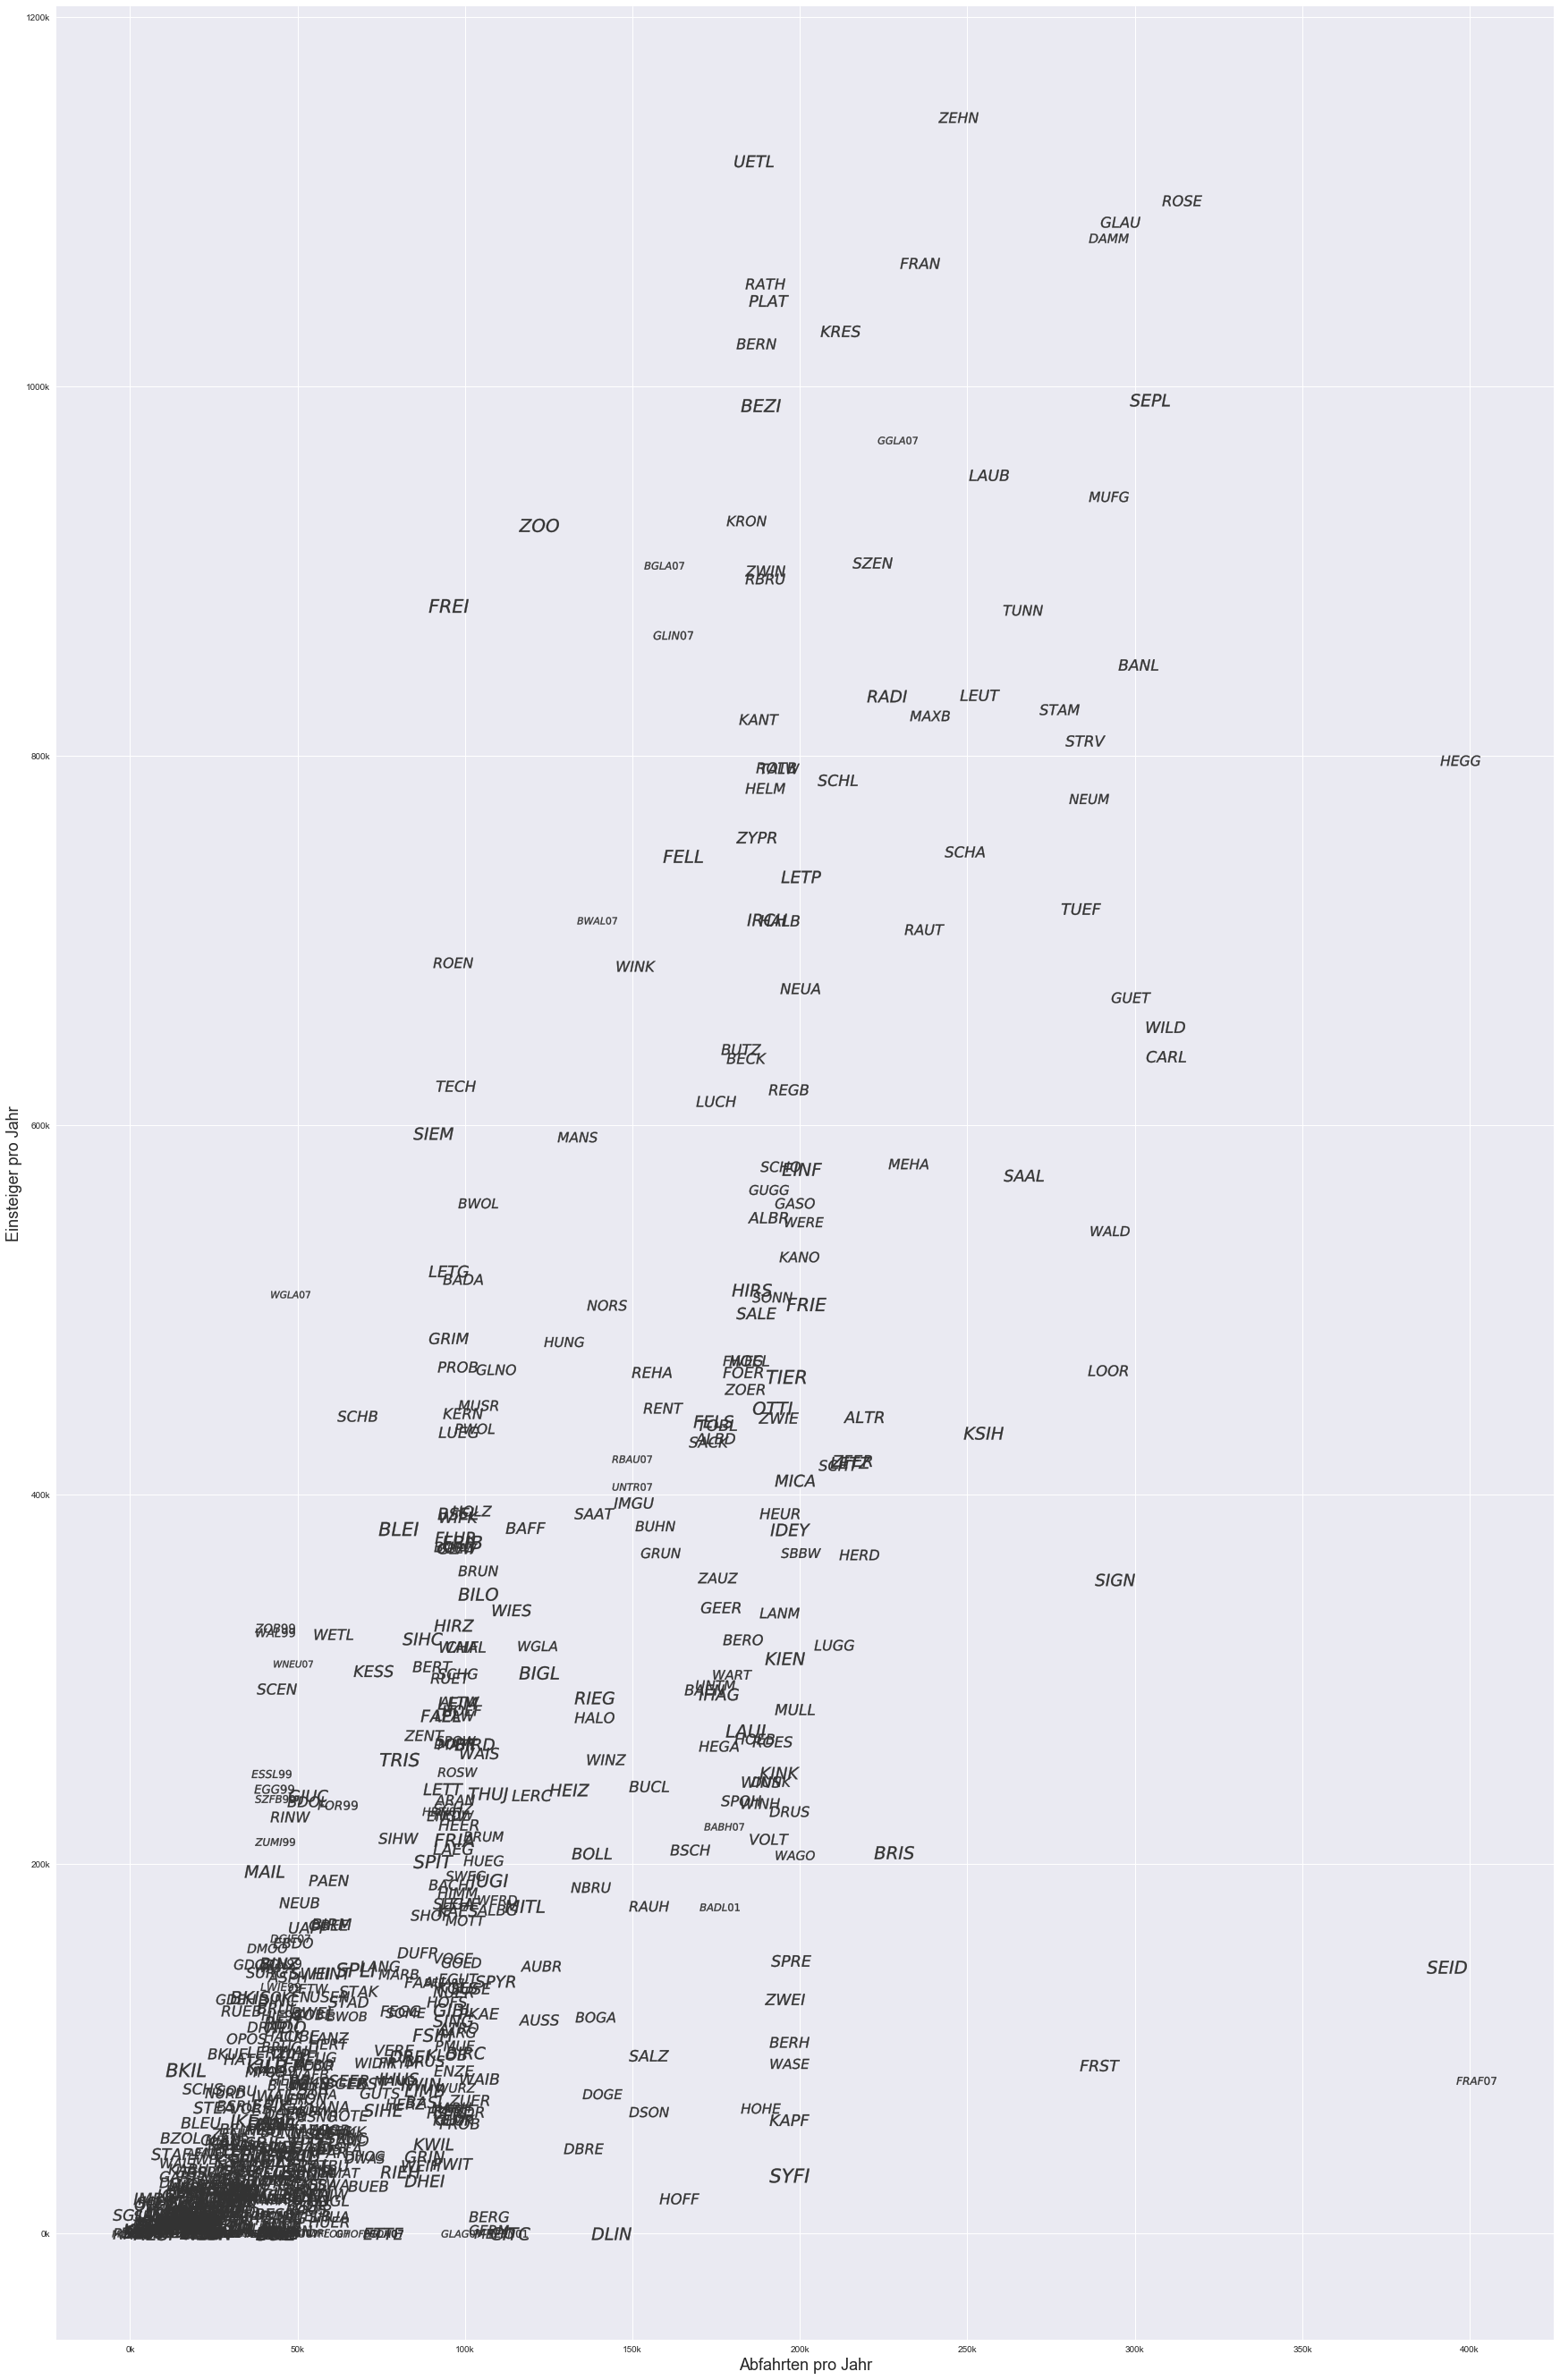

In [354]:
fig = plt.figure(figsize = (30,48))
ax = fig.add_subplot(111)

ax.set_xlabel("Abfahrten pro Jahr", fontsize=18)
ax.set_ylabel("Einsteiger pro Jahr", fontsize=18)
ax.xaxis.set_major_formatter(formatter_thousands)
ax.yaxis.set_major_formatter(formatter_thousands)


for stop in df_stops.sort_values(by="Einsteiger_per_year")[0:math.floor(len(df_stops)*0.9)].to_dict("records"):
    name = f"{stop['stop_kuerzel']}"
    ax.scatter([stop["abfahrten_per_year"]]
               ,[stop["Einsteiger_per_year"]]
               ,c = (0.2,0.2,0.2)
               ,marker = f"${name}$"
              , s = 2000)
   


Touren - Vergleich Abfahrten & Besetzung
==

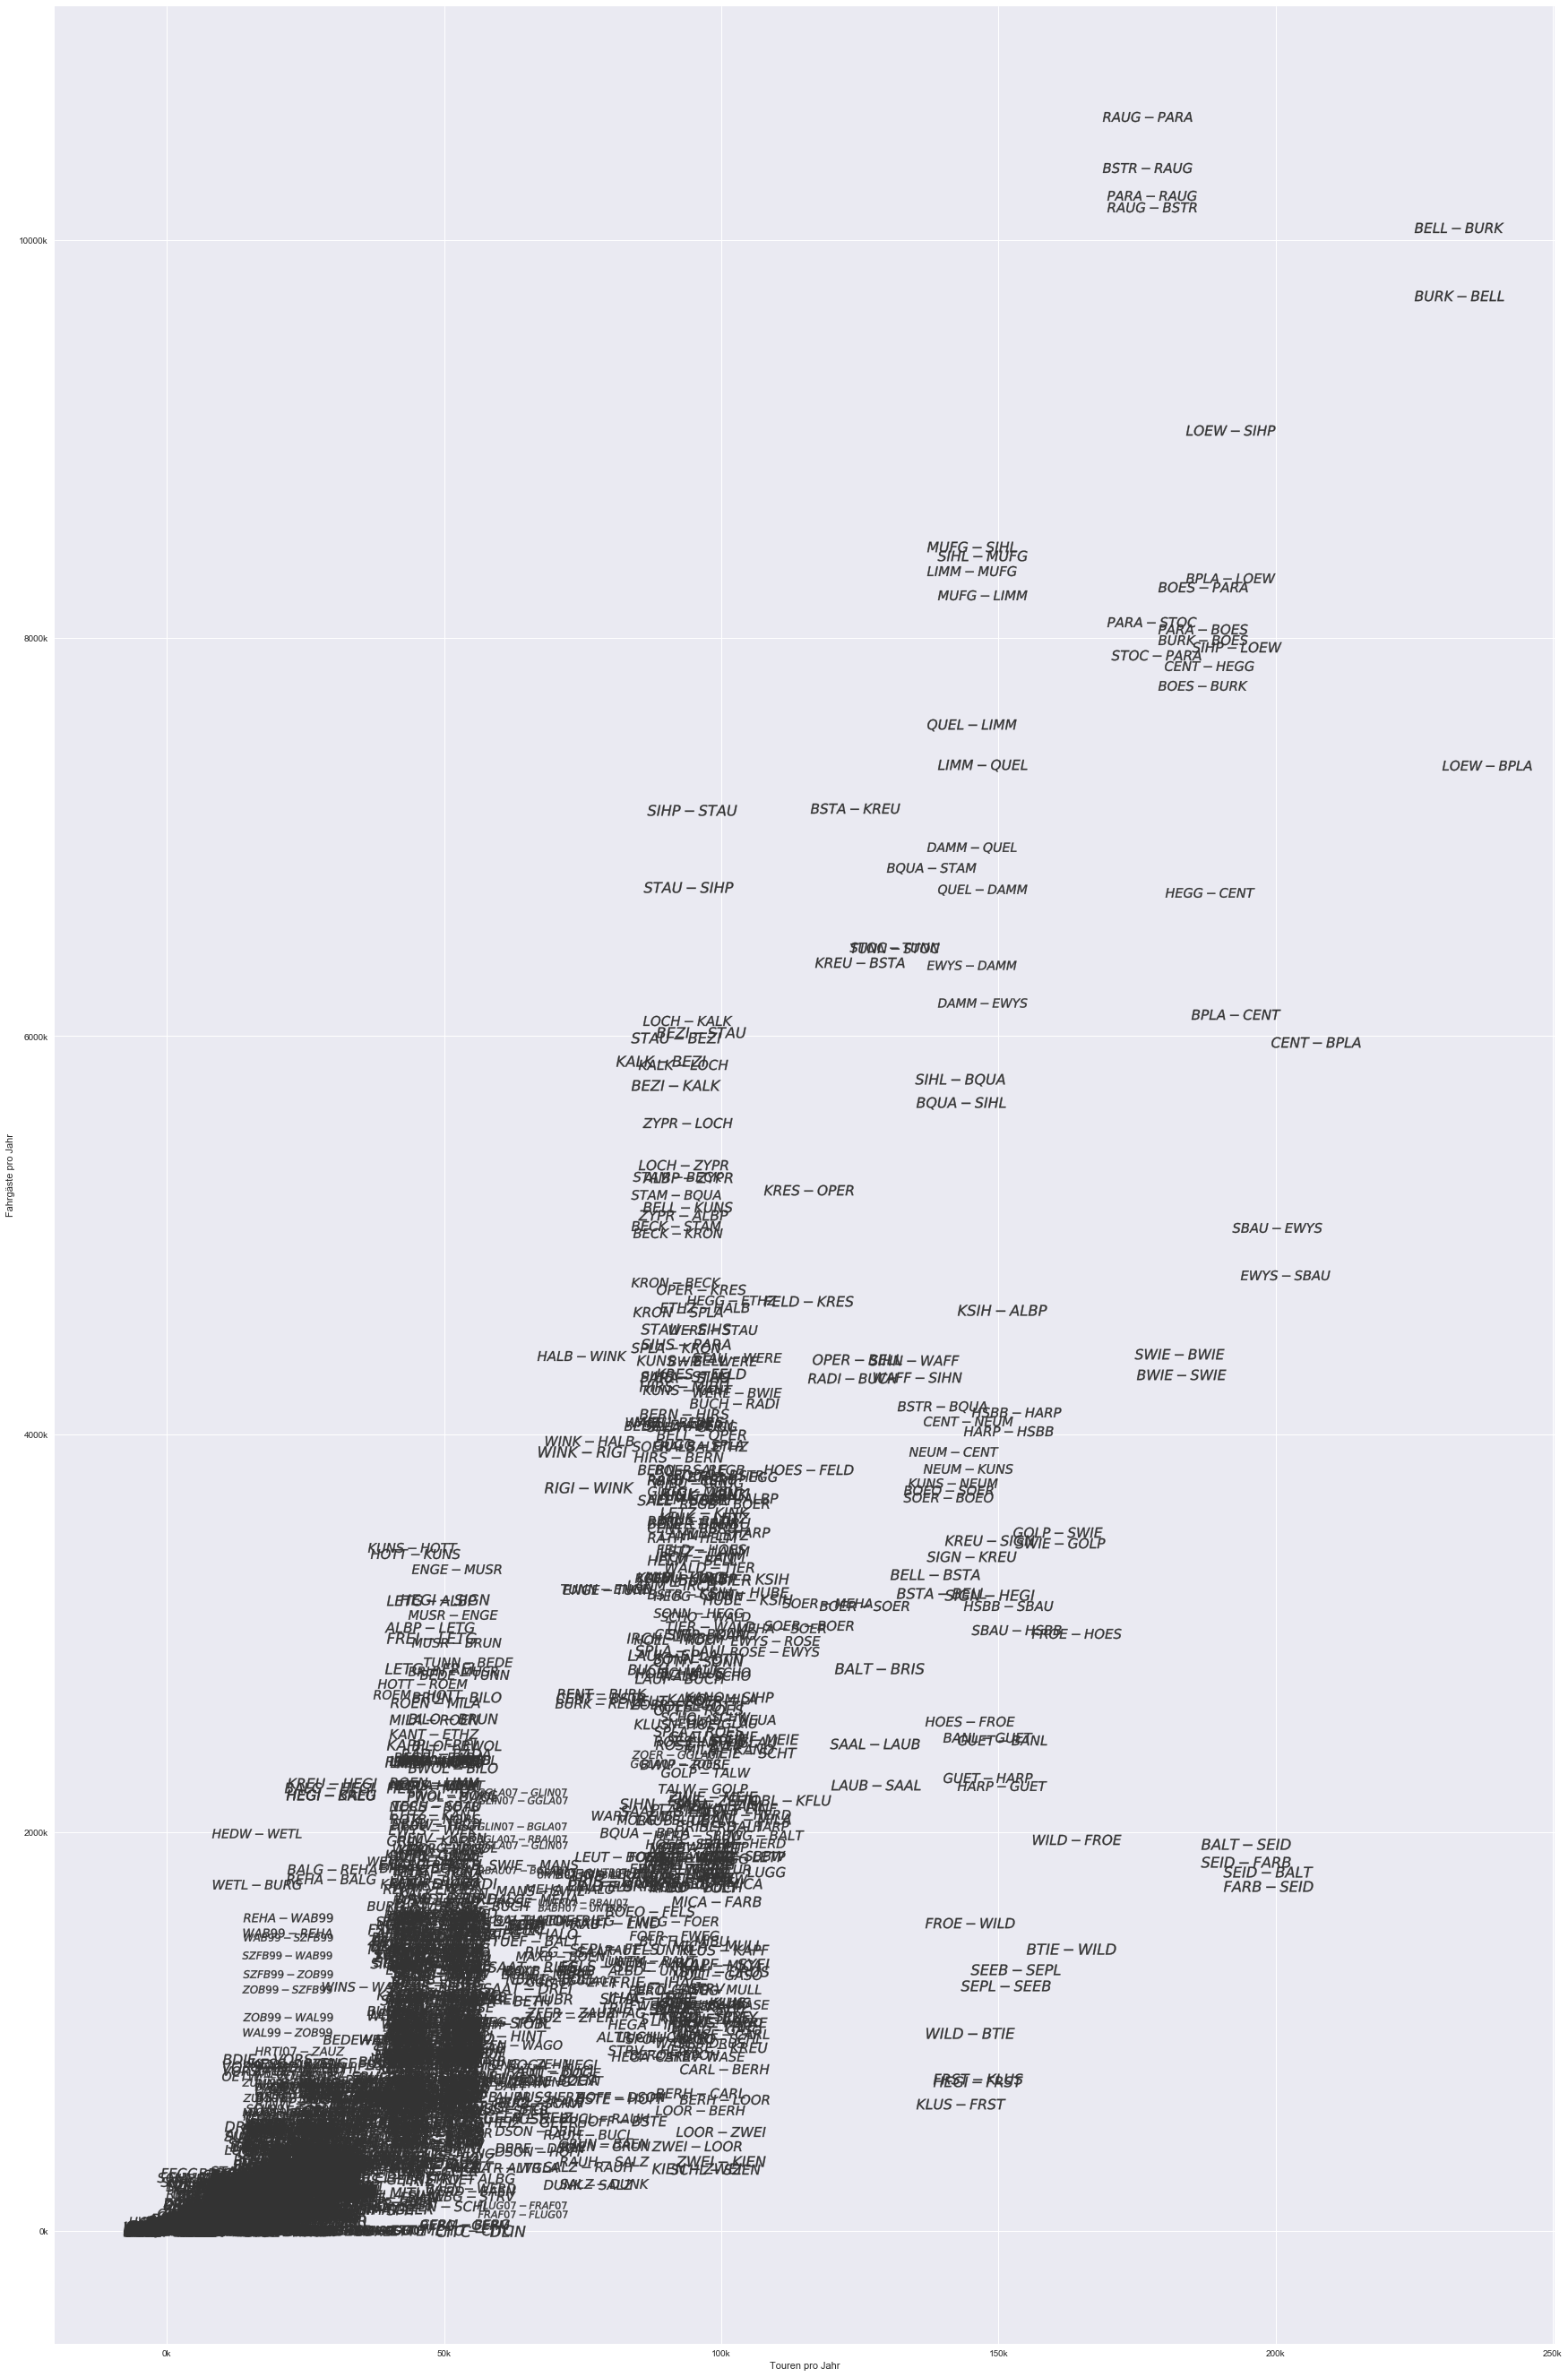

In [362]:
fig = plt.figure(figsize = (30,48))
ax = fig.add_subplot(111)

ax.set_xlabel("Touren pro Jahr")
ax.set_ylabel("Fahrgäste pro Jahr")
ax.xaxis.set_major_formatter(formatter_thousands)
ax.yaxis.set_major_formatter(formatter_thousands)





for tour in df_tours.to_dict("records"):
    name = f"{tour['stop_kuerzel_von']}-{tour['stop_kuerzel_nach']}"
    ax.scatter([tour["abfahrten_per_year"]]
               ,[tour["Besetzung_per_year"]]
               ,c = (0.2,0.2,0.2)
               ,marker = f"${name}$"
              , s = 10000)


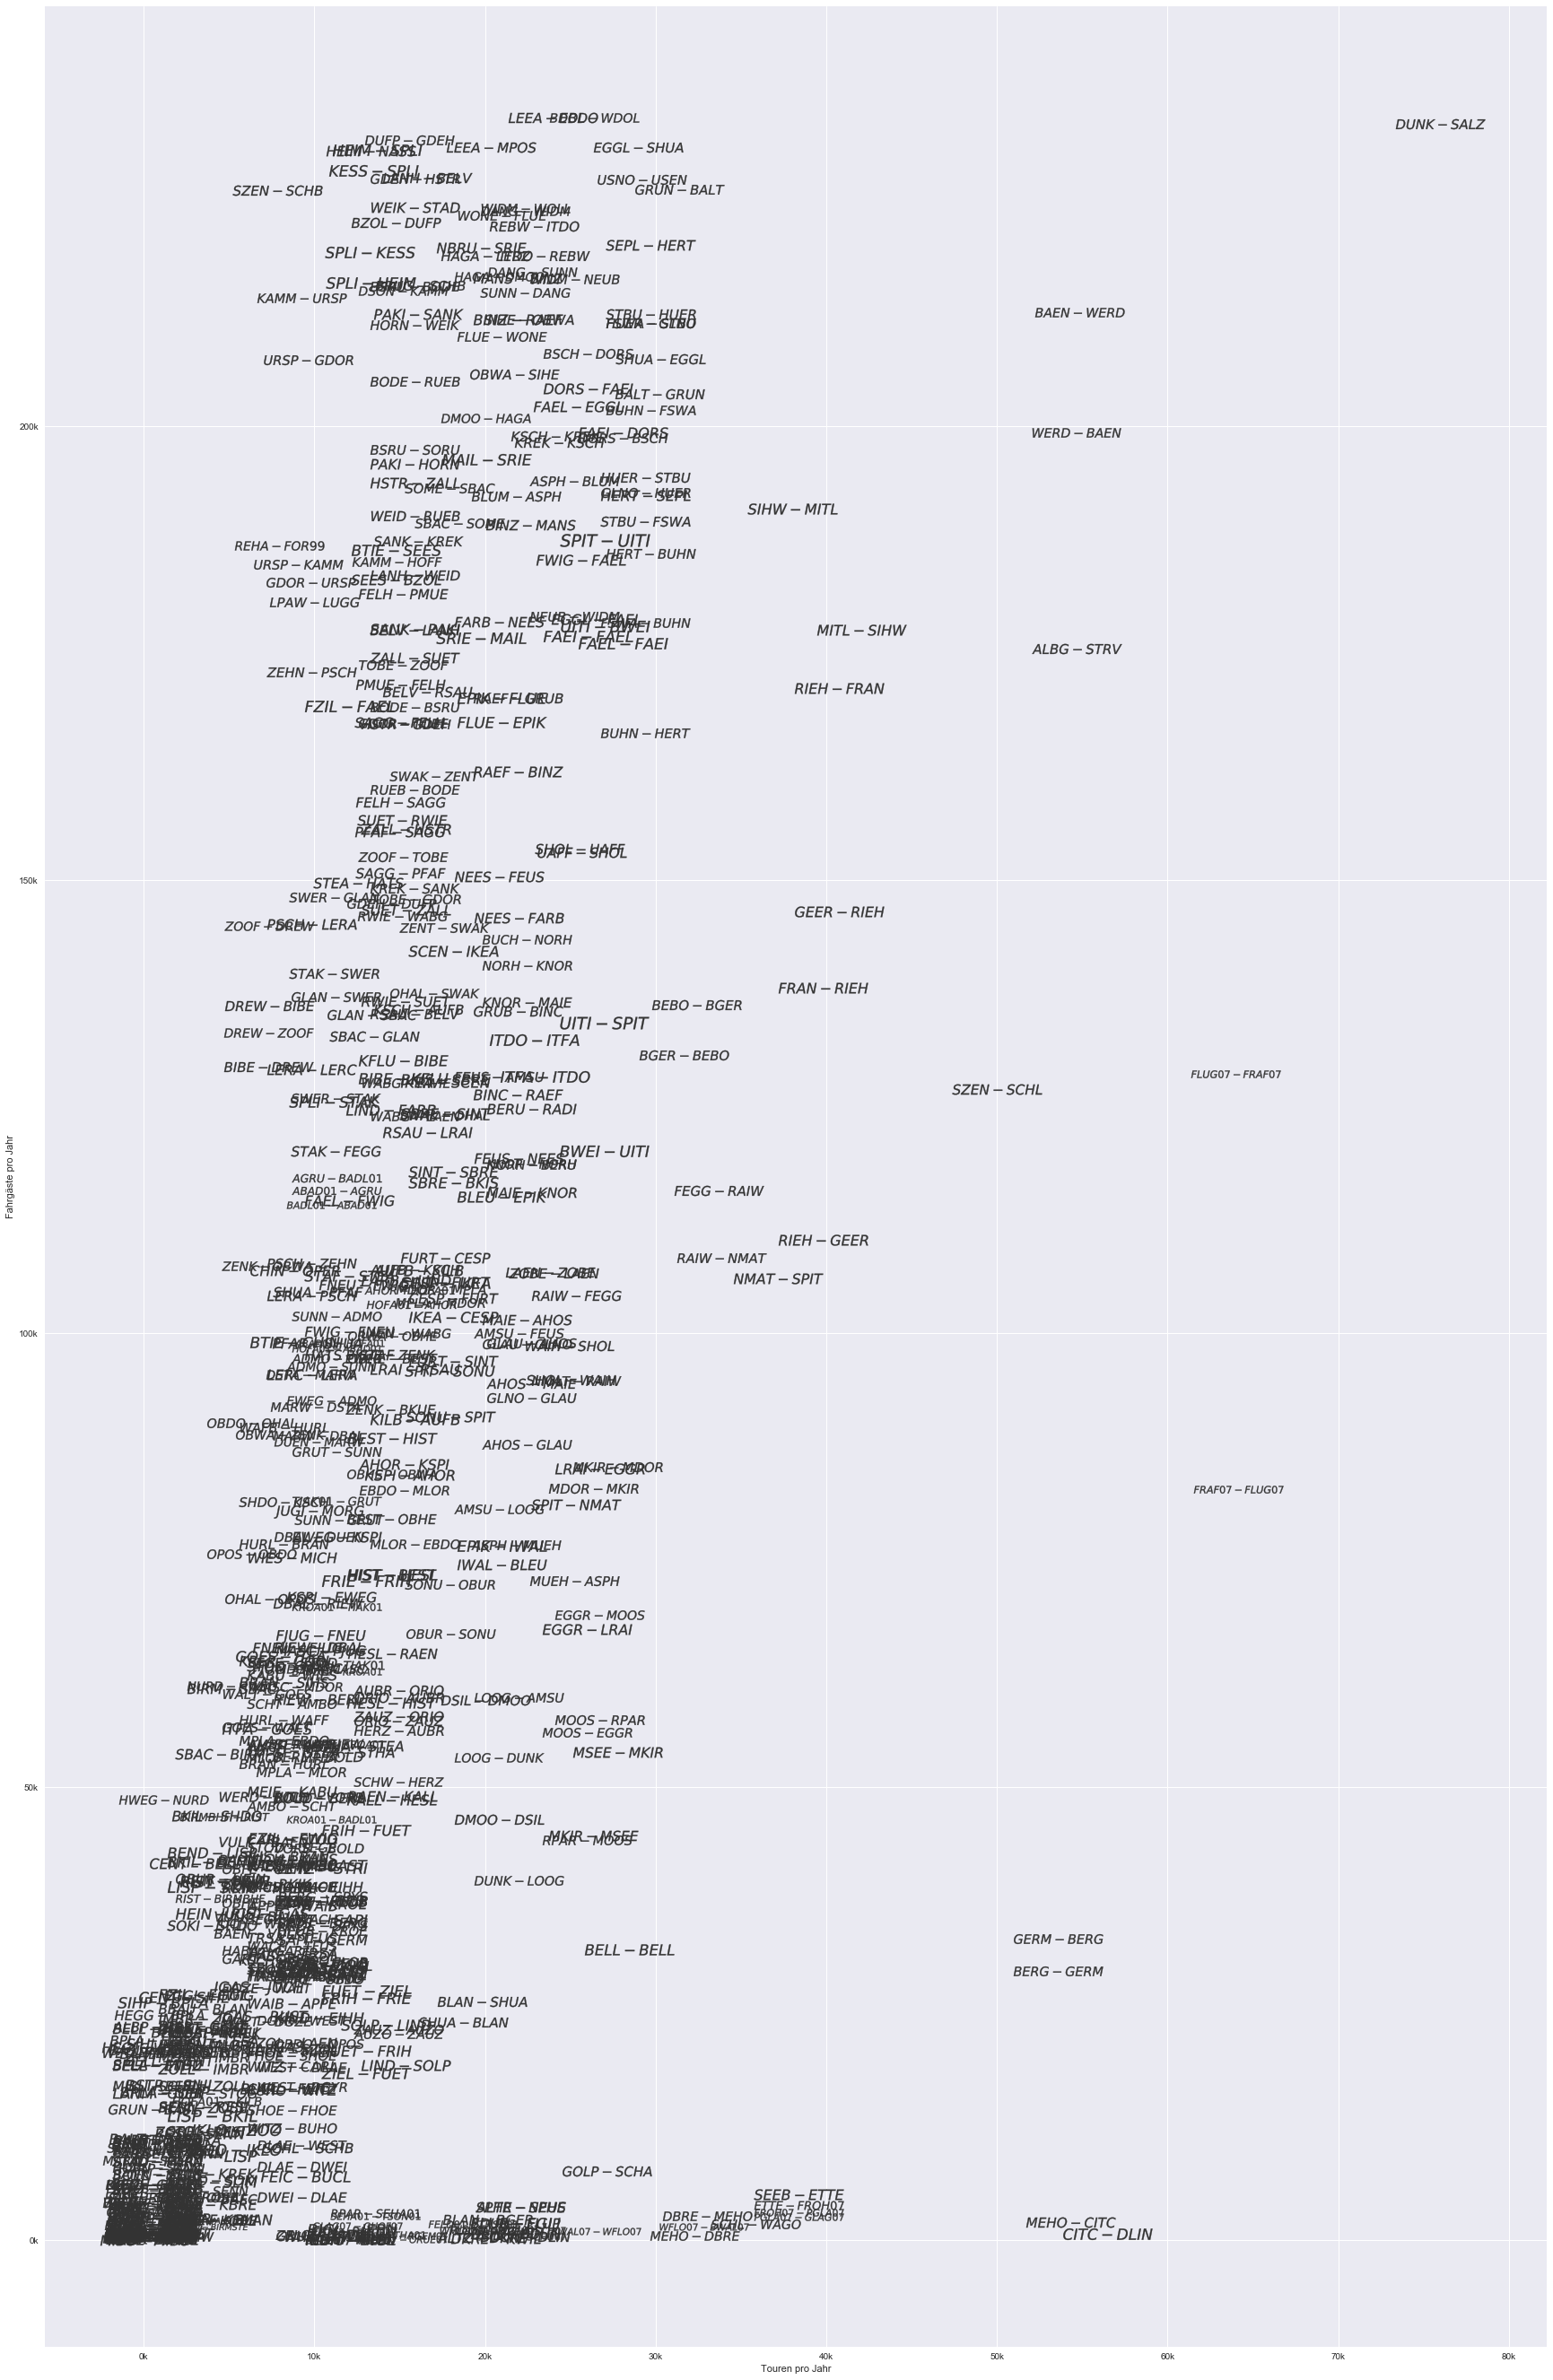

In [363]:
fig = plt.figure(figsize = (30,48))
ax = fig.add_subplot(111)

ax.set_xlabel("Touren pro Jahr")
ax.set_ylabel("Fahrgäste pro Jahr")
ax.xaxis.set_major_formatter(formatter_thousands)
ax.yaxis.set_major_formatter(formatter_thousands)





for tour in df_tours.sort_values(by="Besetzung_per_year")[0:math.floor(len(df_stops)*0.9)].to_dict("records"):
    name = f"{tour['stop_kuerzel_von']}-{tour['stop_kuerzel_nach']}"
    ax.scatter([tour["abfahrten_per_year"]]
               ,[tour["Besetzung_per_year"]]
               ,c = (0.2,0.2,0.2)
               ,marker = f"${name}$"
              , s = 10000)
